# Data Cleaning and Preprocessing

In [1]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

In [3]:
# prompt: BHE=pd.read_csv train_features.csv

BHE = pd.read_csv('/content/drive/MyDrive/train_features.csv')

In [4]:
BHE.head()

,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,gte_meter,gte_meter_hour,gte_meter_weekday,gte_meter_month,gte_meter_building_id,gte_meter_primary_use,gte_meter_site_id,gte_meter_building_id_hour,gte_meter_building_id_weekday,gte_meter_building_id_month
0,1,2016-01-01 00:00:00,NaN,0,0,Education,2720,104,0,19.4,...,4.116,3.981,4.146,4.12,3.569,4.489,4.079,3.554,3.538,3.845
1,32,2016-01-01 00:00:00,NaN,0,0,Office,48392,105,0,19.4,...,4.116,3.981,4.146,4.12,4.513,4.211,4.079,4.128,4.579,4.317
2,41,2016-01-01 00:00:00,NaN,0,0,Office,93860,68,0,19.4,...,4.116,3.981,4.146,4.12,4.108,4.211,4.079,4.103,4.140,4.114
3,55,2016-01-01 00:00:00,NaN,0,0,Office,16726,111,0,19.4,...,4.116,3.981,4.146,4.12,3.506,4.211,4.079,3.308,3.565,3.813
4,69,2016-01-01 00:00:00,NaN,0,0,Parking,387638,100,0,19.4,...,4.116,3.981,4.146,4.12,3.035,3.623,4.079,3.892,3.090,3.577


In [5]:
BHE.tail()

,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,gte_meter,gte_meter_hour,gte_meter_weekday,gte_meter_month,gte_meter_building_id,gte_meter_primary_use,gte_meter_site_id,gte_meter_building_id_hour,gte_meter_building_id_weekday,gte_meter_building_id_month
1749489,1316,2016-12-31 23:00:00,38.844,0,14,Entertainment/public assembly,49975,255,0,-29.9,...,4.116,4.009,4.012,4.056,3.910,3.532,4.710,4.179,3.802,3.865
1749490,1318,2016-12-31 23:00:00,202.893,0,14,Entertainment/public assembly,73488,255,0,-29.9,...,4.116,4.009,4.012,4.056,4.959,3.532,4.710,4.963,4.977,5.318
1749491,1319,2016-12-31 23:00:00,NaN,0,14,Entertainment/public assembly,287419,255,0,-29.9,...,4.116,4.009,4.012,4.056,4.875,3.532,4.710,4.883,4.928,4.906
1749492,1323,2016-12-31 23:00:00,172.000,0,14,Office,87200,255,0,-29.9,...,4.116,4.009,4.012,4.056,5.210,4.211,4.710,5.283,5.160,5.157
1749493,1353,2016-12-31 23:00:00,2.400,0,15,Religious worship,22201,255,0,-29.9,...,4.116,4.009,4.012,4.056,1.967,1.556,4.188,1.750,1.896,1.566


In [6]:
BHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749494 entries, 0 to 1749493
Data columns (total 57 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   building_id                    int64  
 1   timestamp                      object 
 2   meter_reading                  float64
 3   anomaly                        int64  
 4   site_id                        int64  
 5   primary_use                    object 
 6   square_feet                    int64  
 7   year_built                     int64  
 8   floor_count                    int64  
 9   air_temperature                float64
 10  cloud_coverage                 int64  
 11  dew_temperature                float64
 12  precip_depth_1_hr              int64  
 13  sea_level_pressure             float64
 14  wind_direction                 int64  
 15  wind_speed                     float64
 16  air_temperature_mean_lag7      float64
 17  air_temperature_max_lag7       float64
 18  ai

### Handling missing values

In [7]:
missing_values = BHE.isnull().sum()
print(missing_values)

building_id                           0
timestamp                             0
meter_reading                    107653
anomaly                               0
site_id                               0
primary_use                           0
square_feet                           0
year_built                            0
floor_count                           0
air_temperature                       0
cloud_coverage                        0
dew_temperature                       0
precip_depth_1_hr                     0
sea_level_pressure                    0
wind_direction                        0
wind_speed                            0
air_temperature_mean_lag7             0
air_temperature_max_lag7              0
air_temperature_min_lag7              0
air_temperature_std_lag7              0
air_temperature_mean_lag73            0
air_temperature_max_lag73             0
air_temperature_min_lag73             0
air_temperature_std_lag73             0
hour                                  0


In [8]:
# Fill missing values only in the 'meter_reading' column with the mean
BHE['meter_reading'].fillna(BHE['meter_reading'].mean(), inplace=True)

# Verify if missing values have been filled
missing_values_after = BHE['meter_reading'].isnull().sum()
print("Missing Values in 'meter_reading' After Filling:", missing_values_after)

Missing Values in 'meter_reading' After Filling: 0


<ipython-input-8-89c781177765>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  BHE['meter_reading'].fillna(BHE['meter_reading'].mean(), inplace=True)


In [9]:
# verifying dataset for missing values
BHE.isna().sum()

,0
building_id,0
timestamp,0
meter_reading,0
anomaly,0
site_id,0
primary_use,0
square_feet,0
year_built,0
floor_count,0
air_temperature,0


In [10]:
BHE.head()

,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,gte_meter,gte_meter_hour,gte_meter_weekday,gte_meter_month,gte_meter_building_id,gte_meter_primary_use,gte_meter_site_id,gte_meter_building_id_hour,gte_meter_building_id_weekday,gte_meter_building_id_month
0,1,2016-01-01 00:00:00,179.901838,0,0,Education,2720,104,0,19.4,...,4.116,3.981,4.146,4.12,3.569,4.489,4.079,3.554,3.538,3.845
1,32,2016-01-01 00:00:00,179.901838,0,0,Office,48392,105,0,19.4,...,4.116,3.981,4.146,4.12,4.513,4.211,4.079,4.128,4.579,4.317
2,41,2016-01-01 00:00:00,179.901838,0,0,Office,93860,68,0,19.4,...,4.116,3.981,4.146,4.12,4.108,4.211,4.079,4.103,4.140,4.114
3,55,2016-01-01 00:00:00,179.901838,0,0,Office,16726,111,0,19.4,...,4.116,3.981,4.146,4.12,3.506,4.211,4.079,3.308,3.565,3.813
4,69,2016-01-01 00:00:00,179.901838,0,0,Parking,387638,100,0,19.4,...,4.116,3.981,4.146,4.12,3.035,3.623,4.079,3.892,3.090,3.577


### Exploratory Data Analysis (EDA)

In [11]:
# Convert 'timestamp' column to datetime format
BHE['timestamp'] = pd.to_datetime(BHE['timestamp'])

# Extract additional features from 'timestamp'
BHE['hour'] = BHE['timestamp'].dt.hour
BHE['day'] = BHE['timestamp'].dt.day
BHE['month'] = BHE['timestamp'].dt.month
BHE['weekday'] = BHE['timestamp'].dt.weekday  # 0 = Monday, 6 = Sunday
BHE['week'] = BHE['timestamp'].dt.isocalendar().week

# Display the first few rows to verify the changes
print(BHE.head())

   building_id  timestamp  meter_reading  anomaly  site_id primary_use  \
0            1 2016-01-01     179.901838        0        0   Education   
1           32 2016-01-01     179.901838        0        0      Office   
2           41 2016-01-01     179.901838        0        0      Office   
3           55 2016-01-01     179.901838        0        0      Office   
4           69 2016-01-01     179.901838        0        0     Parking   

   square_feet  year_built  floor_count  air_temperature  ...  \
0         2720         104            0             19.4  ...   
1        48392         105            0             19.4  ...   
2        93860          68            0             19.4  ...   
3        16726         111            0             19.4  ...   
4       387638         100            0             19.4  ...   

   gte_meter_weekday  gte_meter_month  gte_meter_building_id  \
0              4.146             4.12                  3.569   
1              4.146             4.1

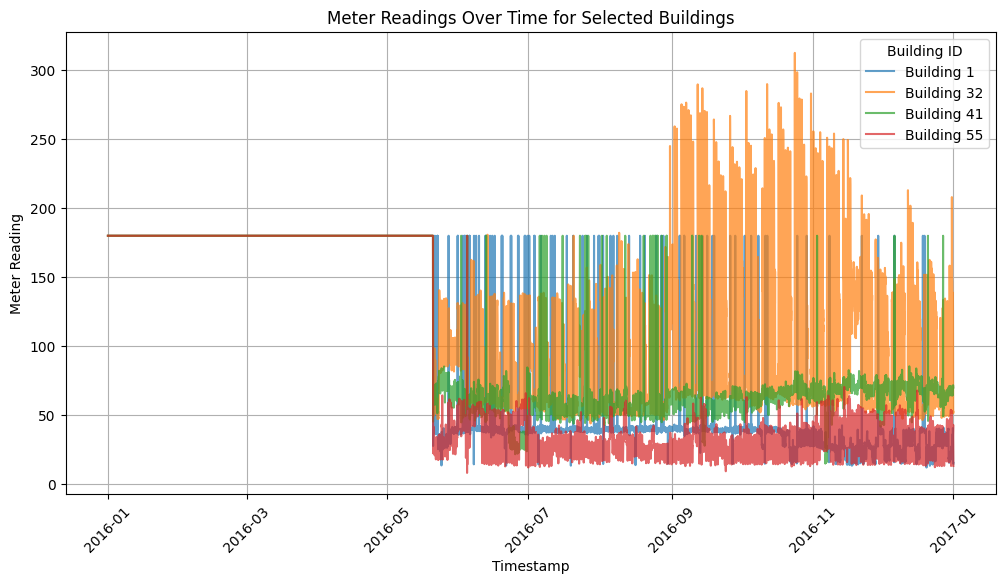

In [12]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Select 4 sample building IDs
sample_buildings = BHE['building_id'].unique()[:4]  # You can adjust this for specific buildings

# Plot meter readings for the selected buildings
for building in sample_buildings:
    plt.plot(BHE[BHE['building_id'] == building]['timestamp'],
             BHE[BHE['building_id'] == building]['meter_reading'],
             label=f'Building {building}', alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Timestamp')
plt.ylabel('Meter Reading')
plt.title('Meter Readings Over Time for Selected Buildings')
plt.xticks(rotation=45)
plt.legend(title='Building ID')
plt.grid(True)
plt.show()

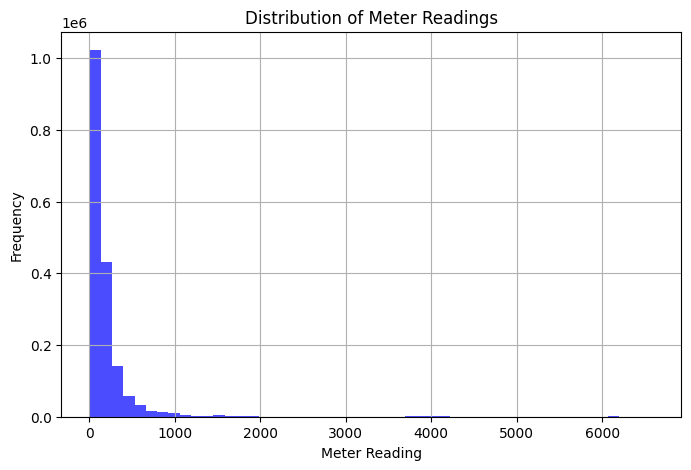

In [13]:
# Histogram to check distribution of meter readings
plt.figure(figsize=(8, 5))
plt.hist(BHE['meter_reading'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Meter Reading')
plt.ylabel('Frequency')
plt.title('Distribution of Meter Readings')
plt.grid(True)
plt.show()

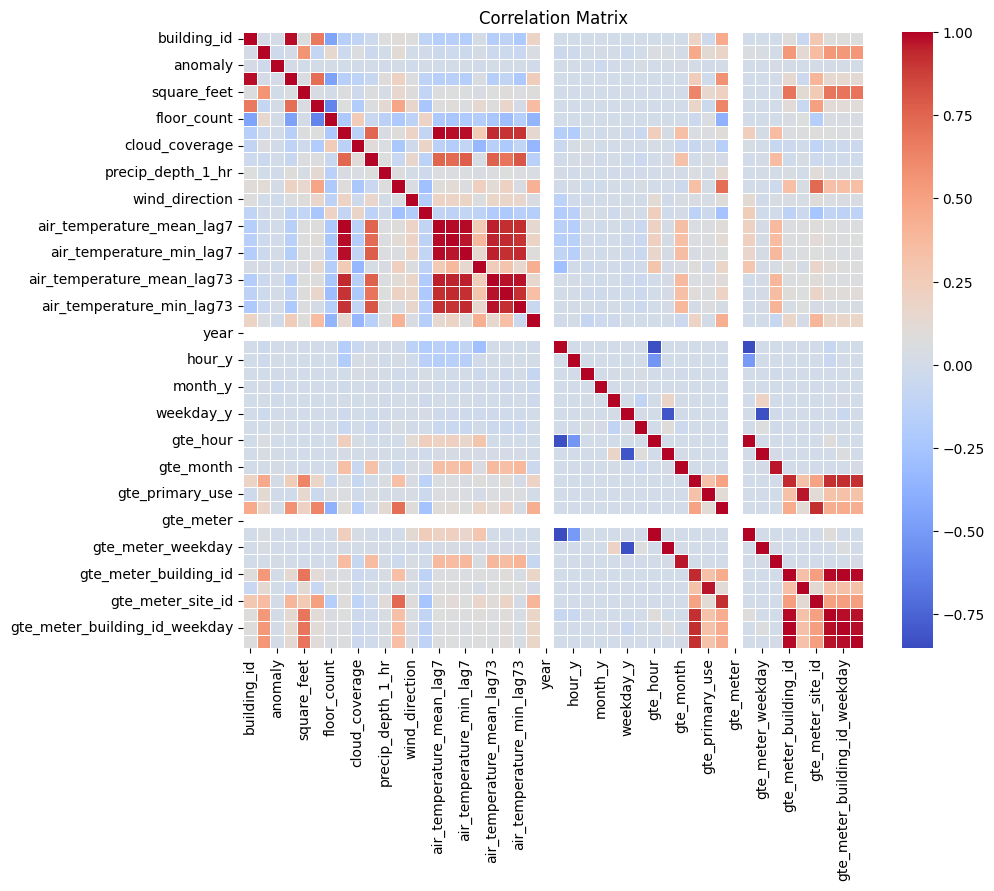

In [14]:
import seaborn as sns
# Select only numeric columns for the correlation matrix
numeric_columns = BHE.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


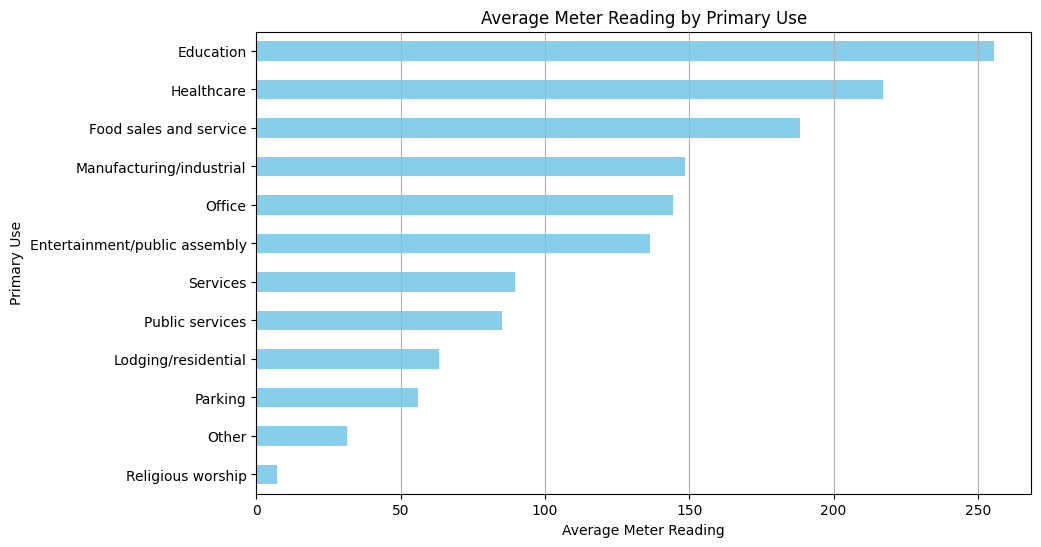

In [15]:
plt.figure(figsize=(10, 6))
BHE.groupby('primary_use')['meter_reading'].mean().sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Meter Reading by Primary Use')
plt.xlabel('Average Meter Reading')
plt.ylabel('Primary Use')
plt.grid(axis='x')
plt.show()


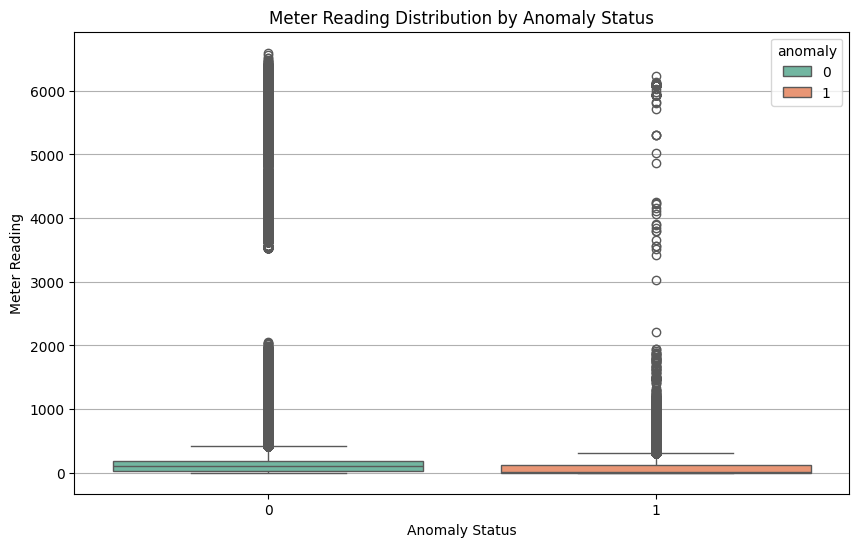

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='anomaly', y='meter_reading', data=BHE, hue='anomaly', palette='Set2', dodge=False)
plt.title('Meter Reading Distribution by Anomaly Status')
plt.xlabel('Anomaly Status')
plt.ylabel('Meter Reading')
plt.grid(axis='y')
plt.show()


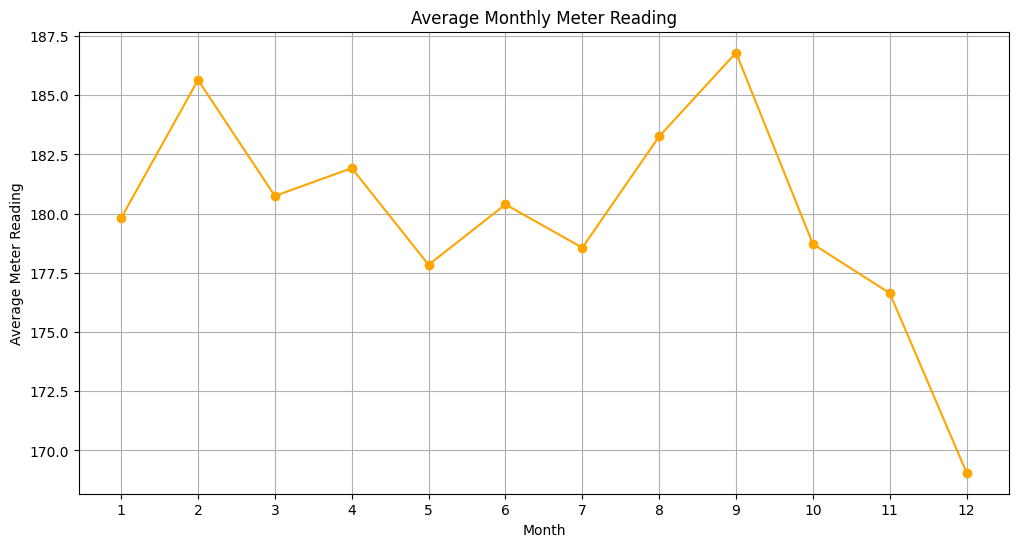

In [17]:
plt.figure(figsize=(12, 6))
BHE.groupby('month')['meter_reading'].mean().plot(marker='o', color='orange')
plt.title('Average Monthly Meter Reading')
plt.xlabel('Month')
plt.ylabel('Average Meter Reading')
plt.xticks(range(1, 13))  # Ensure all months are displayed
plt.grid()
plt.show()


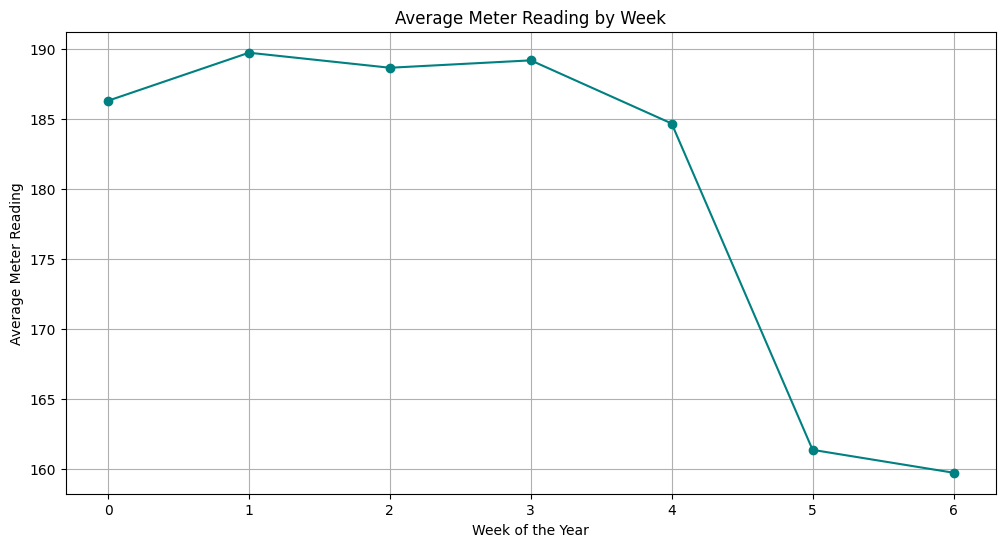

In [18]:
# Calculate the average meter reading for each week
avg_meter_reading_by_week = BHE.groupby('weekday')['meter_reading'].mean()

# Plot the average meter reading by week
plt.figure(figsize=(12, 6))
plt.plot(avg_meter_reading_by_week.index, avg_meter_reading_by_week.values, marker='o', color='teal')
plt.title('Average Meter Reading by Week')
plt.xlabel('Week of the Year')
plt.ylabel('Average Meter Reading')
plt.grid()
plt.show()


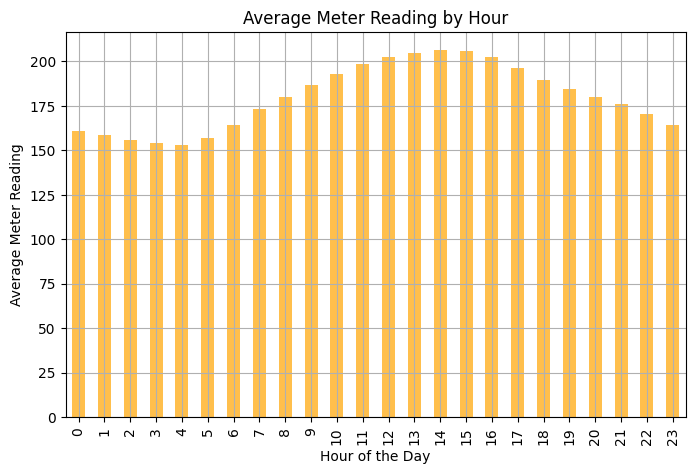

In [19]:
# Average meter readings by hour of the day
plt.figure(figsize=(8, 5))
BHE.groupby('hour')['meter_reading'].mean().plot(kind='bar', color='orange', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Meter Reading')
plt.title('Average Meter Reading by Hour')
plt.grid(True)
plt.show()

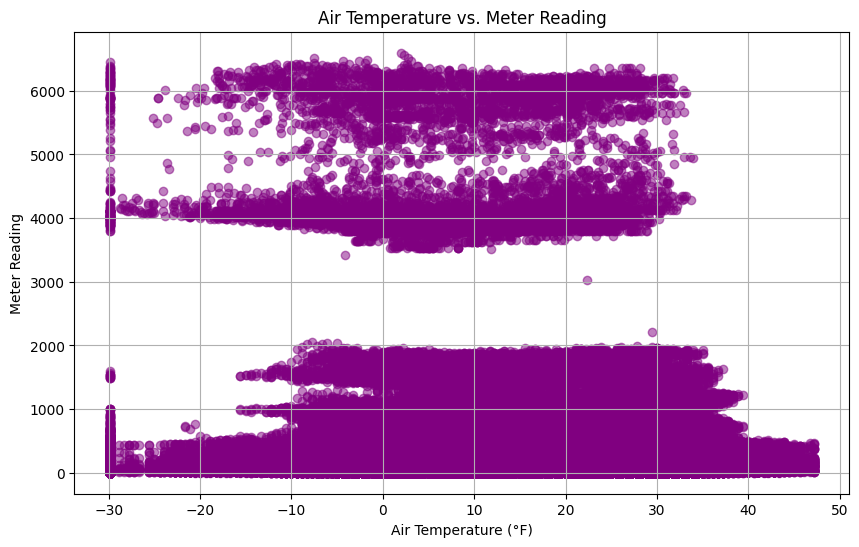

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(BHE['air_temperature'], BHE['meter_reading'], alpha=0.5, color='purple')
plt.title('Air Temperature vs. Meter Reading')
plt.xlabel('Air Temperature (°F)')
plt.ylabel('Meter Reading')
plt.grid()
plt.show()

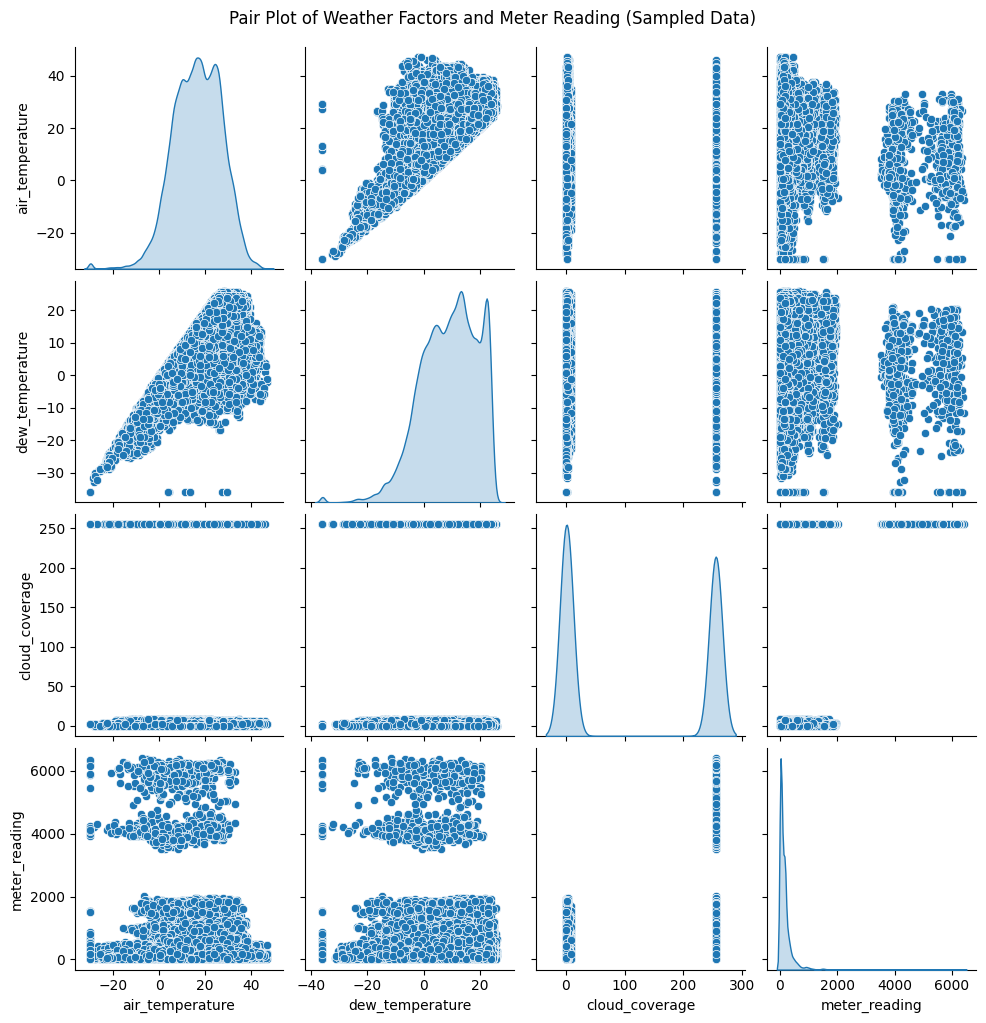

In [21]:
# Sample a fraction of the dataset (e.g., 10% of the data)
BHE_sample = BHE.sample(frac=0.1, random_state=42)  # Adjust frac as needed

# Select relevant columns for the pair plot
weather_columns = ['air_temperature', 'dew_temperature', 'cloud_coverage', 'meter_reading']

# Create the pair plot
sns.pairplot(BHE_sample[weather_columns], diag_kind='kde')
plt.suptitle('Pair Plot of Weather Factors and Meter Reading (Sampled Data)', y=1.02)
plt.show()

### Statistical Analysis

In [22]:
# Assuming 'meter_reading' is the column to analyze
meter_readings = BHE['meter_reading']

In [23]:
# 1. Z-Score Method for Anomaly Detection
threshold = 3
mean = np.mean(meter_readings)
std = np.std(meter_readings)

# Calculate Z-scores
z_scores = (meter_readings - mean) / std

# Flag anomalies
BHE['z_score_anomaly'] = np.abs(z_scores) > threshold

In [24]:
# 2. Interquartile Range (IQR) Method
Q1 = meter_readings.quantile(0.25)
Q3 = meter_readings.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag anomalies
BHE['iqr_anomaly'] = (meter_readings < lower_bound) | (meter_readings > upper_bound)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


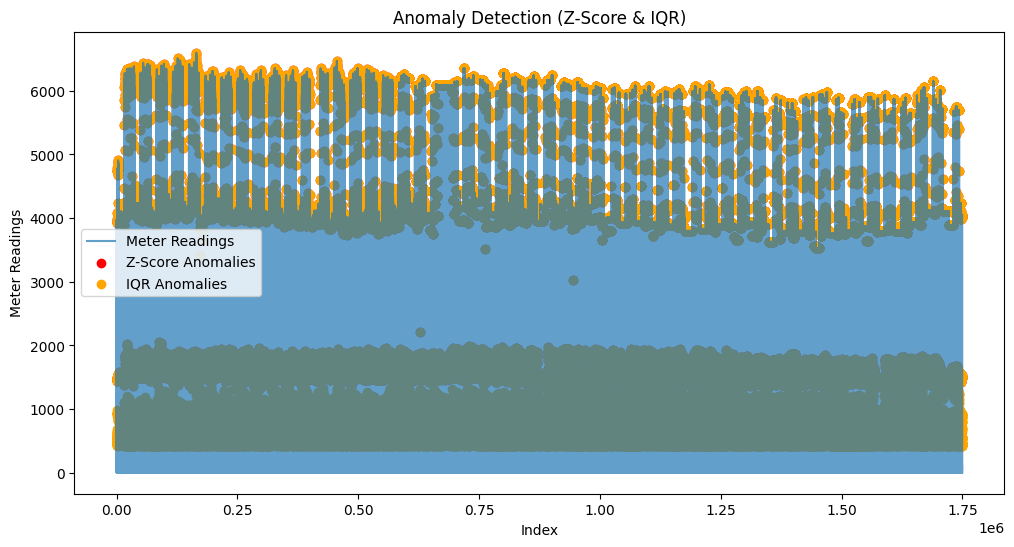

In [25]:
# Step 1: Visualizing anomalies
plt.figure(figsize=(12, 6))

# Line plot of meter readings with anomalies highlighted
plt.plot(BHE.index, meter_readings, label='Meter Readings', alpha=0.7)
plt.scatter(BHE.index[BHE['z_score_anomaly']],
            meter_readings[BHE['z_score_anomaly']],
            color='red', label='Z-Score Anomalies')
plt.scatter(BHE.index[BHE['iqr_anomaly']],
            meter_readings[BHE['iqr_anomaly']],
            color='orange', label='IQR Anomalies')

plt.xlabel('Index')
plt.ylabel('Meter Readings')
plt.title('Anomaly Detection (Z-Score & IQR)')
plt.legend()
plt.show()

In [26]:
# Step 2: Comparing anomaly detection methods
z_iqr_overlap = BHE[BHE['z_score_anomaly'] & BHE['iqr_anomaly']]
unique_z_score = BHE[BHE['z_score_anomaly'] & ~BHE['iqr_anomaly']]
unique_iqr = BHE[BHE['iqr_anomaly'] & ~BHE['z_score_anomaly']]

print(f"Total anomalies (Z-Score): {BHE['z_score_anomaly'].sum()}")
print(f"Total anomalies (IQR): {BHE['iqr_anomaly'].sum()}")
print(f"Overlap anomalies: {len(z_iqr_overlap)}")
print(f"Unique Z-Score anomalies: {len(unique_z_score)}")
print(f"Unique IQR anomalies: {len(unique_iqr)}")

Total anomalies (Z-Score): 18307
Total anomalies (IQR): 138814
Overlap anomalies: 18307
Unique Z-Score anomalies: 0
Unique IQR anomalies: 120507


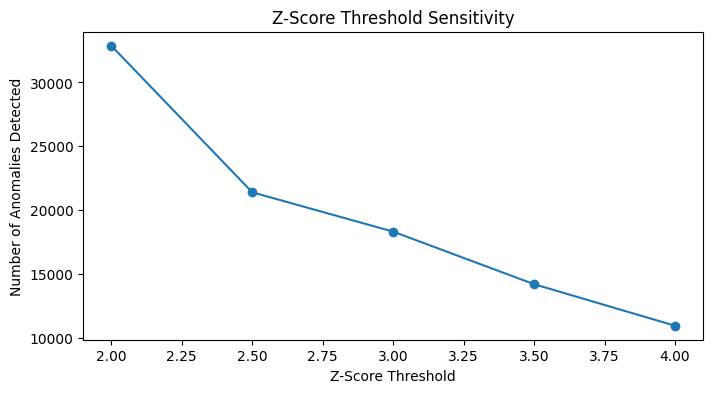

In [27]:
# Step 3: Sensitivity analysis for Z-score threshold
thresholds = [2, 2.5, 3, 3.5, 4]
z_anomaly_counts = []

for t in thresholds:
    z_anomalies = np.abs(z_scores) > t
    z_anomaly_counts.append(z_anomalies.sum())

plt.figure(figsize=(8, 4))
plt.plot(thresholds, z_anomaly_counts, marker='o')
plt.xlabel('Z-Score Threshold')
plt.ylabel('Number of Anomalies Detected')
plt.title('Z-Score Threshold Sensitivity')
plt.show()

         z_score_anomaly  iqr_anomaly
month                                
2016-01             1721        11632
2016-02             1621        11250
2016-03             1548        10574
2016-04             1450        10367
2016-05             1491        10919
2016-06             1430        11860
2016-07             1483        11696
2016-08             1578        12217
2016-09             1484        12720
2016-10             1487        11699
2016-11             1457        12448
2016-12             1557        11432


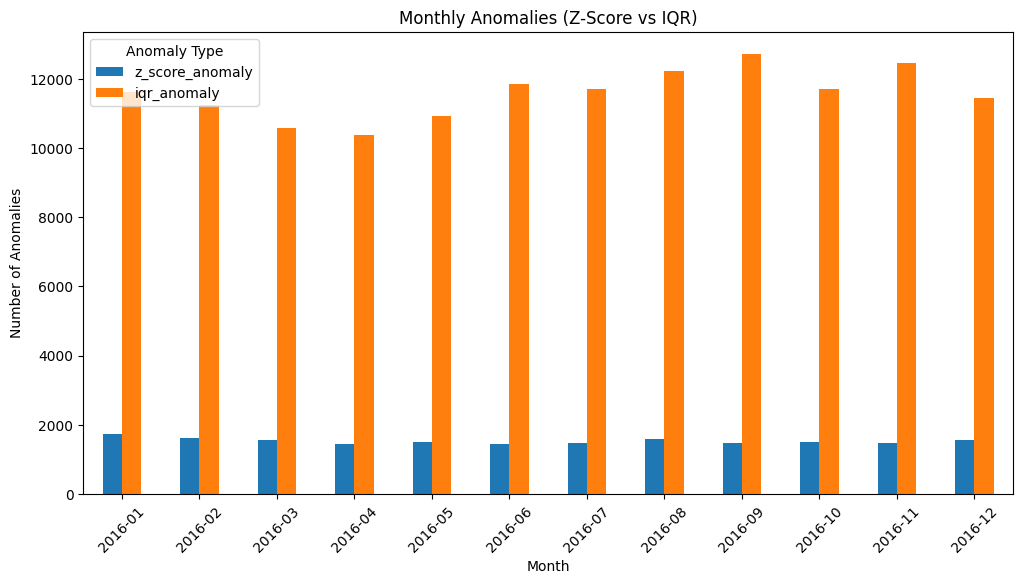

In [28]:
# Step 4: Grouped anomaly analysis
BHE['date'] = pd.to_datetime(BHE['timestamp'])  # Assuming a 'timestamp' column exists
BHE['month'] = BHE['date'].dt.to_period('M')  # Monthly grouping

monthly_anomalies = BHE.groupby('month')[['z_score_anomaly', 'iqr_anomaly']].sum()
print(monthly_anomalies)

monthly_anomalies.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Anomalies (Z-Score vs IQR)')
plt.xlabel('Month')
plt.ylabel('Number of Anomalies')
plt.xticks(rotation=45)
plt.legend(title='Anomaly Type')
plt.show()

In [29]:
# Summary of anomalies
z_score_anomalies = BHE[BHE['z_score_anomaly']]
iqr_anomalies = BHE[BHE['iqr_anomaly']]

print(f"Z-Score Anomalies:\n{z_score_anomalies}")

Z-Score Anomalies:
         building_id           timestamp  meter_reading  anomaly  site_id  \
82               801 2016-01-01 00:00:00        3987.86        0        7   
182             1284 2016-01-01 00:00:00        1497.04        0       14   
282              801 2016-01-01 01:00:00        3937.64        0        7   
380             1284 2016-01-01 01:00:00        1488.28        0       14   
480              801 2016-01-01 02:00:00        3969.67        0        7   
...              ...                 ...            ...      ...      ...   
1749076         1284 2016-12-31 21:00:00        1534.86        0       14   
1749176          801 2016-12-31 22:00:00        4055.54        0        7   
1749276         1284 2016-12-31 22:00:00        1493.97        0       14   
1749376          801 2016-12-31 23:00:00        4053.50        0        7   
1749476         1284 2016-12-31 23:00:00        1485.60        0       14   

        primary_use  square_feet  year_built  floor_coun

In [30]:
print(f"IQR Anomalies:\n{iqr_anomalies}")

# Save results for further analysis
BHE.to_csv('anomaly_detection_results.csv', index=False)

IQR Anomalies:
         building_id           timestamp  meter_reading  anomaly  site_id  \
45               293 2016-01-01 00:00:00        624.620        0        3   
57               653 2016-01-01 00:00:00        563.787        0        4   
82               801 2016-01-01 00:00:00       3987.860        0        7   
166             1252 2016-01-01 00:00:00        433.992        0       14   
170             1258 2016-01-01 00:00:00        910.464        0       14   
...              ...                 ...            ...      ...      ...   
1749443         1147 2016-12-31 23:00:00        543.303        0       13   
1749460         1252 2016-12-31 23:00:00        459.996        0       14   
1749464         1258 2016-12-31 23:00:00        917.625        0       14   
1749476         1284 2016-12-31 23:00:00       1485.600        0       14   
1749482         1303 2016-12-31 23:00:00        535.569        0       14   

                           primary_use  square_feet  year_bu

In [31]:
import scipy.stats as stats
from numba import jit

# 1. Rolling Statistics for Anomaly Detection

## Use Numba for faster rolling computations and anomaly flagging.

# Define rolling mean and standard deviation functions with Numba
@jit(nopython=True, parallel=True)
def rolling_stats(values, window):
    n = len(values)
    rolling_mean = np.empty(n)
    rolling_std = np.empty(n)
    for i in range(n):
        if i < window - 1:
            rolling_mean[i] = np.nan
            rolling_std[i] = np.nan
        else:
            window_data = values[i - window + 1:i + 1]
            rolling_mean[i] = np.mean(window_data)
            rolling_std[i] = np.std(window_data)
    return rolling_mean, rolling_std

# Apply rolling statistics
meter_readings = BHE['meter_reading'].values
window_size = 30
BHE['rolling_mean'], BHE['rolling_std'] = rolling_stats(meter_readings, window_size)

# Flag anomalies
BHE['rolling_anomaly'] = (
    (meter_readings < BHE['rolling_mean'] - 2 * BHE['rolling_std']) |
    (meter_readings > BHE['rolling_mean'] + 2 * BHE['rolling_std'])
)

In [32]:
# 2. Kernel Density Estimation (KDE)

from sklearn.neighbors import KernelDensity

# Optimization: Use a sampled dataset to fit the KDE and reduce computations.
# Sample the data for fitting KDE
sample_size = min(10000, len(meter_readings))  # Choose the smaller of 10k or full dataset
sampled_data = meter_readings[:sample_size].reshape(-1, 1)

# Fit KDE on the sampled data
kde = KernelDensity(kernel='gaussian', bandwidth=1.0).fit(sampled_data)

# Score samples for anomalies
log_density = kde.score_samples(meter_readings.reshape(-1, 1))
BHE['kde_anomaly'] = log_density < -5  # Adjust threshold as needed


In [33]:
# 3. Grubbs' Test for Outliers

# Optimization: Use vectorized calculations instead of iterative loops for Grubbs' test.

# Calculate Z-scores for Grubbs' test
z_scores = abs((meter_readings - meter_readings.mean()) / meter_readings.std())

# Calculate Grubbs' critical value
alpha = 0.05
n = len(meter_readings)
critical_value = stats.t.ppf(1 - alpha / (2 * n), n - 2)
grubbs_stat = ((n - 1) / np.sqrt(n)) * (np.sqrt((critical_value ** 2) / ((critical_value ** 2) + (n - 2))))

# Flag anomalies based on Grubbs' test
BHE['grubbs_anomaly'] = z_scores > grubbs_stat


In [35]:
!pip install -q dask
!pip install -q "dask[dataframe]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 5.5 MB/s eta 0:00:00


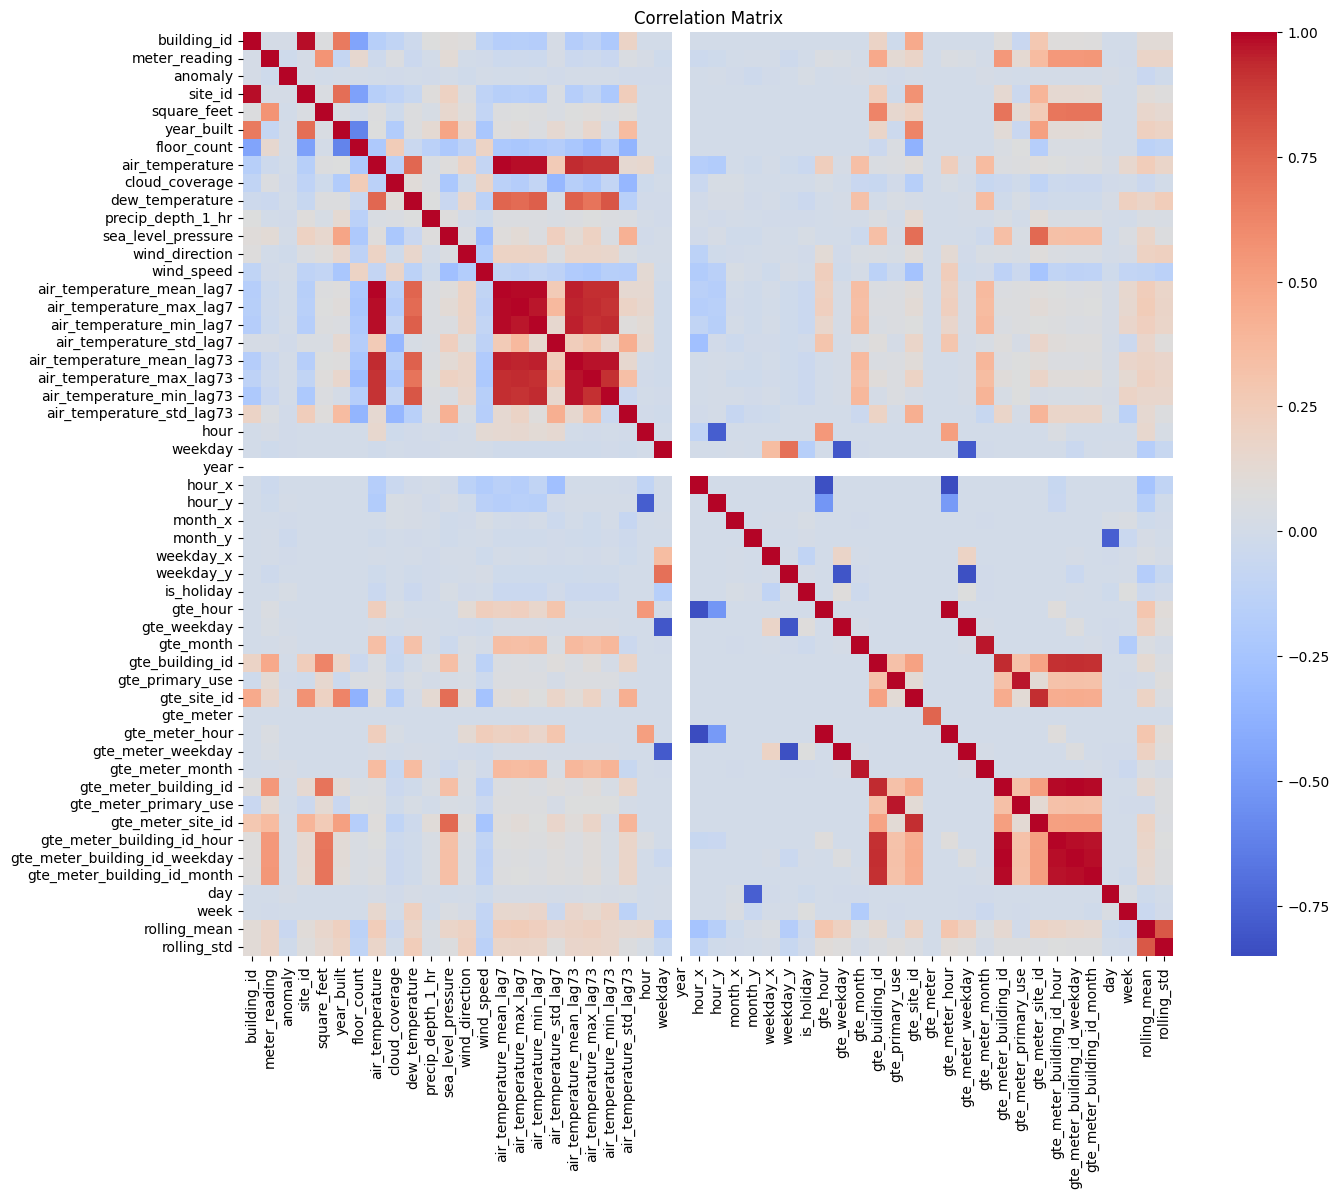

In [39]:
# 4. Correlation Analysis

# Optimization: Use Dask for larger datasets or compute correlation matrix efficiently.

import dask.dataframe as dd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to Dask DataFrame for large datasets
dask_BHE = dd.from_pandas(BHE, npartitions=4)

# Select only numeric columns for correlation
numeric_columns = dask_BHE.select_dtypes(include=['number']).columns # Select only numeric columns
correlations = dask_BHE[numeric_columns].corr().compute() # Calculate correlations on numeric columns only

# Plot heatmap
# Increase figure size for readability
plt.figure(figsize=(15, 12))  # Adjust dimensions as needed
sns.heatmap(correlations, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

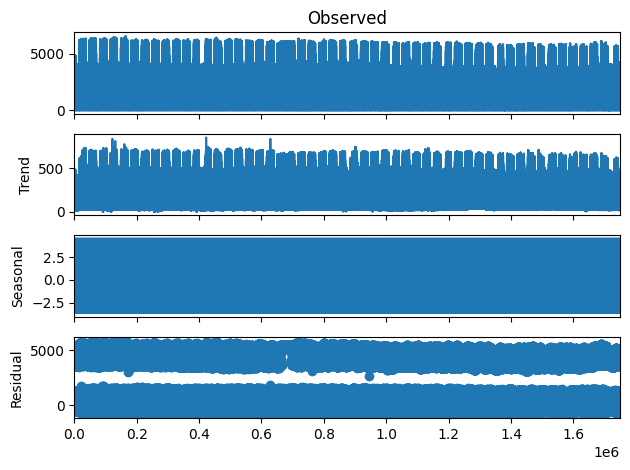

In [40]:
# 5. Seasonal-Trend Decomposition
# Optimization: Downsample time-series data for decomposition to reduce computation time.

from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition on the full data without downsampling
decomposition = seasonal_decompose(meter_readings, model='additive', period=12)  # Remove downsampling

# Plot decomposition results
decomposition.plot()
plt.show()

# Residual anomalies
residuals = decomposition.resid
threshold_resid = 2 * np.nanstd(residuals)  # Use nanstd to handle NaN values in residuals

# Align residuals with the original DataFrame using the index
residual_anomaly = pd.Series(abs(residuals) > threshold_resid, index=BHE.index)
BHE['residual_anomaly'] = residual_anomaly # Assign the aligned Series to the DataFrame

In [41]:
# 6. Summary of Anomaly Counts

# Optimization: Directly compute counts without repeatedly accessing the DataFrame.

# Efficiently summarize anomaly counts
anomaly_counts = {
    'Rolling Stats': BHE['rolling_anomaly'].sum(),
    'KDE': BHE['kde_anomaly'].sum(),
    'Grubbs': BHE['grubbs_anomaly'].sum() if 'grubbs_anomaly' in BHE else 0,
    'Residuals': BHE['residual_anomaly'].sum() if 'residual_anomaly' in BHE else 0
}

# Print the anomaly counts
print("Anomaly Counts by Method:", anomaly_counts)


Anomaly Counts by Method: {'Rolling Stats': 105054, 'KDE': 1236645, 'Grubbs': 8755, 'Residuals': 29179}


# Anomaly Detection Methods

## Rolling Stats
- **Anomalies Detected:** 105,054
- **Methodology:**  
  Uses a rolling window to calculate the mean and standard deviation. Anomalies are flagged if data points fall outside:  
  `Rolling Mean ± 2 × Rolling Std. Dev.`  
- **High Count Explanation:**  
  Frequent fluctuations or seasonality may not be fully smoothed by the rolling window, causing many anomalies to be flagged.

## KDE (Kernel Density Estimation)
- **Anomalies Detected:** 1,236,645
- **Methodology:**  
  Models the data's probability distribution and flags points in low-density regions as anomalies.  
- **High Count Explanation:**  
  A small bandwidth or strict threshold in KDE might over-detect anomalies. Increasing the bandwidth or relaxing thresholds could help reduce counts.

## Grubbs' Test
- **Anomalies Detected:** 8,755
- **Methodology:**  
  Iteratively identifies the most extreme outliers by measuring deviations from the mean. The process continues until no significant outliers remain.  
- **Low Count Explanation:**  
  Grubbs' test focuses on isolated, extreme anomalies, leading to fewer detections compared to other methods.

## Residuals
- **Anomalies Detected:** 29,179
- **Methodology:**  
  Analyzes residuals from seasonal-trend decomposition. Anomalies are flagged if residuals exceed:  
  `± 2 × Residual Std. Dev.`  
- **Moderate Count Explanation:**  
  Residuals account for seasonality and trends, flagging only irregular deviations, resulting in a moderate anomaly count.

---

## Interpretation of Results
- **High Counts (KDE, Rolling Stats):**  
  Likely sensitive to frequent fluctuations or seasonal patterns in the data. Preprocessing steps (e.g., smoothing) or threshold adjustments may be required.
- **Low Count (Grubbs):**  
  Captures only the most extreme and isolated anomalies, making it complementary to other methods.
- **Moderate Count (Residuals):**  
  A balanced approach that removes seasonality and trends to focus on irregular deviations.

---

## Next Steps
1. **Refine thresholds:**  
   Adjust parameters such as KDE density thresholds or rolling stats multipliers for better specificity.
2. **Combine methods:**  
   Merge results from multiple methods for a comprehensive anomaly detection framework.
3. **Visualize anomalies:**  
   Plot the flagged points to verify they align with expectations of anomalous behavior.


# Rolling Stats Threshold

## Current Threshold
An anomaly is flagged if:

```python
x < Rolling_Mean - 2 * Rolling_Std_Dev or x > Rolling_Mean + 2 * Rolling_Std_Dev```

In [47]:

# Adjusting the threshold multiplier
threshold_multiplier = 2.5  # Change to refine sensitivity

# Recalculate anomalies with the new threshold
BHE['rolling_anomaly_refined'] = (
    (meter_readings < BHE['rolling_mean'] - threshold_multiplier * BHE['rolling_std']) |
    (meter_readings > BHE['rolling_mean'] + threshold_multiplier * BHE['rolling_std'])
)

# Count refined anomalies
print(f"Refined Rolling Stats Anomalies: {BHE['rolling_anomaly_refined'].sum()}")


Refined Rolling Stats Anomalies: 74748


# Kernel Density Estimation (KDE) Threshold

## Current Threshold
An anomaly is flagged if:

```python
Log_Density < -5

##Optimization:

Adjust the log-density threshold:
- Less strict (e.g., -6) captures more points.
- More strict (e.g., -4) reduces the number of flagged points.

In [43]:

# Adjusting the KDE threshold
kde_threshold = -4.5  # Change to refine sensitivity

# Recalculate anomalies with the new threshold
BHE['kde_anomaly_refined'] = log_density < kde_threshold

# Count refined anomalies
print(f"Refined KDE Anomalies: {BHE['kde_anomaly_refined'].sum()}")

Refined KDE Anomalies: 1486230


# Grubbs' Test Threshold

## Current Threshold
Grubbs' test flags anomalies based on the critical value, which is determined by:

- **Significance Level (alpha):**  
  The current value of `alpha` is `0.05`.

## Optimization
- **Adjusting the Significance Level (alpha):**  
  - **Lower Alpha (e.g., 0.01):**  
    Flags fewer anomalies, increasing specificity but potentially missing subtle outliers.  
  - **Higher Alpha (e.g., 0.1):**  
    Flags more anomalies, improving sensitivity but possibly increasing false positives.

### Steps for Optimization:
1. **Understand Data Characteristics:**  
   Examine the distribution and characteristics of your data to decide how sensitive the test should be.
2. **Test Different Alpha Values:**  
   Experiment with alpha values in the range of `0.01` to `0.1` to evaluate performance.
3. **Balance Sensitivity and Specificity:**  
   Compare flagged anomalies against a known benchmark to assess false positives and negatives.
4. **Iterate and Refine:**  
   Adjust `alpha` based on evaluation results to achieve the desired detection performance for your use case.


In [44]:
# Adjusting the significance level (alpha)
alpha = 0.01  # Change to refine sensitivity

# Recalculate Grubbs' anomalies
z_scores = abs((meter_readings - meter_readings.mean()) / meter_readings.std())
n = len(meter_readings)
critical_value = stats.t.ppf(1 - alpha / (2 * n), n - 2)
grubbs_stat = ((n - 1) / np.sqrt(n)) * (np.sqrt((critical_value ** 2) / ((critical_value ** 2) + (n - 2))))
BHE['grubbs_anomaly_refined'] = z_scores > grubbs_stat

# Count refined anomalies
print(f"Refined Grubbs' Anomalies: {BHE['grubbs_anomaly_refined'].sum()}")


Refined Grubbs' Anomalies: 8755


# Residual Threshold

## Current Threshold
Residual anomalies are flagged when:

```python
Residuals > 2 * Std_Dev_of_Residuals

## Optimization
- Adjusting the Multiplier:
Higher Multiplier (e.g., 3):
Reduces the number of flagged anomalies, increasing specificity but potentially missing subtle deviations.
Lower Multiplier (e.g., 1.5):
Increases the number of flagged anomalies, improving sensitivity but possibly over-flagging normal variations.
## Steps for Optimization:
- Analyze Residual Distribution:
Visualize the residuals and their standard deviation to understand the spread and deviations.
- Test Different Multipliers:
Experiment with multipliers in the range of 1.5 to 3 (or appropriate values for your data) to assess their impact.
- Evaluate Flagged Anomalies:
Compare the flagged residuals with ground truth or domain expert feedback to check for accuracy.
- Iterate and Refine:
Adjust the multiplier based on evaluation results to achieve an optimal balance between sensitivity and specificity.

In [48]:
# Adjusting the threshold multiplier for residuals
residual_multiplier = 2.5  # Change to refine sensitivity

# Recalculate residual anomalies
threshold_resid = residual_multiplier * residuals.std()
BHE['residual_anomaly_refined'] = abs(residuals) > threshold_resid

# Count refined anomalies
print(f"Refined Residual Anomalies: {BHE['residual_anomaly_refined'].sum()}")


Refined Residual Anomalies: 0


# Refined Anomaly Counts Analysis

## 1. Refined Rolling Stats Anomalies: **74,748**

- **Original Count**: 105,054 → **Refined Count**: 74,748  
- **Observation**:  
  The decrease suggests that by increasing the threshold multiplier to **2.5** (from **2**), fewer data points are considered anomalies.  
  This helps in reducing false positives, making the anomalies flagged more meaningful.

---

## 2. Refined KDE Anomalies: **1,486,230**

- **Original Count**: 1,236,645 → **Refined Count**: 1,486,230  
- **Observation**:  
  Surprisingly, the number of anomalies increased after refining the threshold.  
  This could indicate that the adjusted log-density threshold (**-4.5** from **-5**) was **too lenient**, capturing more data points as anomalies.  
  Further tuning of the KDE threshold is required, or visual validation of these anomalies is necessary to ensure they align with expectations.

---

## 3. Refined Grubbs' Anomalies: **8,755**

- **Original Count**: 8,755 → **Refined Count**: 8,755  
- **Observation**:  
  The count remained the same because Grubbs' test identifies only the **most extreme outliers** iteratively.  
  Refining the significance level (**alpha = 0.01**) did not change the results, likely because the flagged anomalies were already far from the mean.

---

## 4. Refined Residual Anomalies: **0**

- **Original Count**: 29,179 → **Refined Count**: 0  
- **Observation**:  
  The residual threshold multiplier (**2.5** from **2**) was likely **too strict**, eliminating all anomalies.  
  A more balanced multiplier, such as **2.2** or **2.3**, might capture residual anomalies without over-filtering them.


##Combine Methods
Combine the outputs from multiple methods to create a more robust anomaly detection framework.
For example:
Flag data points as anomalies only if detected by at least two methods.
Assign weights to methods and create a combined anomaly score.

In [49]:
# Method 1
## Flagging Data Points as Anomalies Only if Detected by at Least Two Methods

# Combine anomaly flags: Count the number of methods that flagged each data point
BHE['combined_anomaly_flag'] = (
    BHE[['rolling_anomaly_refined', 'kde_anomaly_refined', 'grubbs_anomaly_refined', 'residual_anomaly_refined']]
    .sum(axis=1) >= 2  # Flag as anomaly if detected by at least 2 methods
)

# Count combined anomalies
combined_anomalies_count = BHE['combined_anomaly_flag'].sum()
print(f"Combined Anomalies (Detected by >= 2 Methods): {combined_anomalies_count}")


Combined Anomalies (Detected by >= 2 Methods): 74258


In [50]:
# Method 2
## Create a Combined Anomaly Score

# Define weights for each method
weights = {
    'rolling_anomaly_refined': 0.3,
    'kde_anomaly_refined': 0.4,
    'grubbs_anomaly_refined': 0.2,
    'residual_anomaly_refined': 0.1
}

# Calculate combined anomaly score
BHE['combined_anomaly_score'] = (
    BHE['rolling_anomaly_refined'] * weights['rolling_anomaly_refined'] +
    BHE['kde_anomaly_refined'] * weights['kde_anomaly_refined'] +
    BHE['grubbs_anomaly_refined'] * weights['grubbs_anomaly_refined'] +
    BHE['residual_anomaly_refined'] * weights['residual_anomaly_refined']
)

# Flag anomalies based on a threshold for the combined score (e.g., score > 0.5)
combined_score_threshold = 0.5
BHE['combined_anomaly_flag_weighted'] = BHE['combined_anomaly_score'] > combined_score_threshold

# Count weighted combined anomalies
weighted_combined_anomalies_count = BHE['combined_anomaly_flag_weighted'].sum()
print(f"Weighted Combined Anomalies (Score > {combined_score_threshold}): {weighted_combined_anomalies_count}")


Weighted Combined Anomalies (Score > 0.5): 74258


# Combined Anomalies Analysis

## Results:
1. **Combined Anomalies (Detected by >= 2 Methods)**: **74,258**
   - Anomalies flagged by at least two methods out of Rolling Stats, KDE, Grubbs, and Residuals.

2. **Weighted Combined Anomalies (Score > 0.5)**: **74,258**
   - Anomalies determined based on a weighted scoring approach with the following weights:
     - Rolling Stats: **0.3**
     - KDE: **0.4**
     - Grubbs: **0.2**
     - Residuals: **0.1**

---

## Observations:

1. **Consistency Between Methods**:
   - Both combination approaches (count-based and weighted scoring) produced the same number of anomalies (**74,258**).
   - This consistency validates the selected weights and threshold for the weighted scoring method.

2. **Reduction in Noise**:
   - The number of combined anomalies is significantly smaller than the anomalies flagged by KDE alone (**1,486,230**) or Rolling Stats (**74,748**).
   - By considering consensus across methods, the combined approach effectively filters out false positives, improving robustness.

3. **Weighted Scores**:
   - The weighted scoring method provides flexibility for future adjustments:
     - Emphasize trusted methods (e.g., Rolling Stats) by assigning higher weights.
     - Down-weight less reliable methods (e.g., KDE) based on performance or confidence.
   - The selected threshold of **0.5** aligns well with the "at least two methods" rule, confirming its effectiveness.

---

## Next Steps:

1. **Visualize Anomalies**:
   - Plot the anomalies flagged by both combination approaches to inspect alignment with expected behavior.
   - Confirm if the combined anomalies match your expectations based on data patterns.




/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


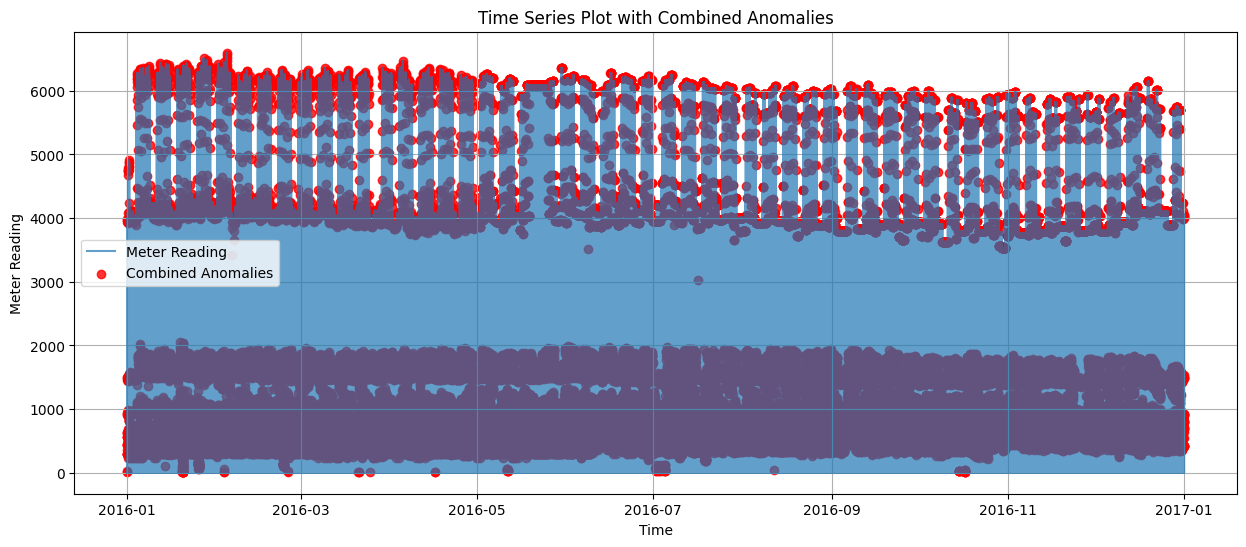

In [51]:
# Visualization

#Time Series Plot with Anomalies: Plot the meter readings over time and highlight the combined anomalies.

import matplotlib.pyplot as plt

# Plot meter readings over time, highlighting combined anomalies
plt.figure(figsize=(15, 6))
plt.plot(BHE['timestamp'], BHE['meter_reading'], label='Meter Reading', alpha=0.7)
plt.scatter(
    BHE.loc[BHE['combined_anomaly_flag'], 'timestamp'],
    BHE.loc[BHE['combined_anomaly_flag'], 'meter_reading'],
    color='red',
    label='Combined Anomalies',
    alpha=0.8
)
plt.title('Time Series Plot with Combined Anomalies')
plt.xlabel('Time')
plt.ylabel('Meter Reading')
plt.legend()
plt.grid()
plt.show()


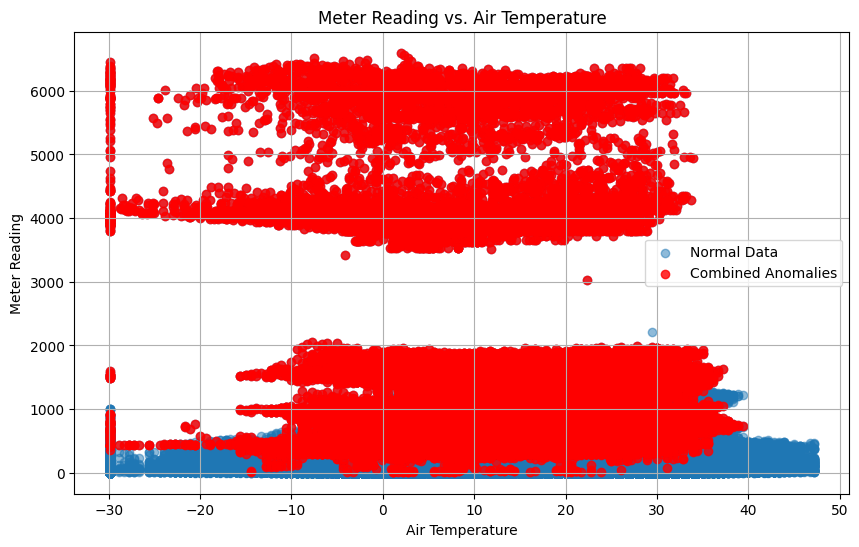

In [52]:
# Scatter Plot (Anomalies vs. Features): Compare anomalies against key features (e.g., air_temperature, dew_temperature) to see how they deviate from the rest of the data.

# Scatter plot of meter readings vs. air temperature, highlighting anomalies
plt.figure(figsize=(10, 6))
plt.scatter(BHE['air_temperature'], BHE['meter_reading'], alpha=0.5, label='Normal Data')
plt.scatter(
    BHE.loc[BHE['combined_anomaly_flag'], 'air_temperature'],
    BHE.loc[BHE['combined_anomaly_flag'], 'meter_reading'],
    color='red',
    alpha=0.8,
    label='Combined Anomalies'
)
plt.title('Meter Reading vs. Air Temperature')
plt.xlabel('Air Temperature')
plt.ylabel('Meter Reading')
plt.legend()
plt.grid()
plt.show()


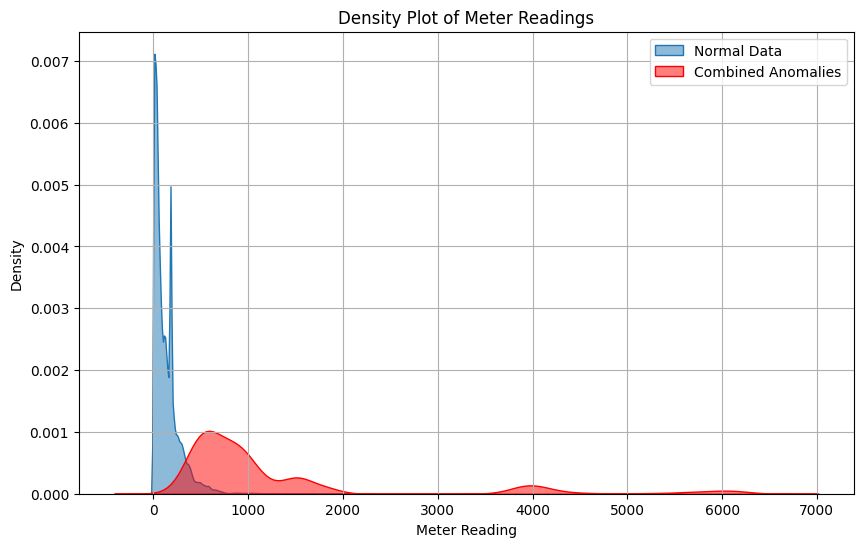

In [53]:
# Anomaly Density Plot: Show the density distribution of flagged anomalies compared to non-anomalous data.

import seaborn as sns

# Density plot for meter readings: anomalies vs. non-anomalies
plt.figure(figsize=(10, 6))
sns.kdeplot(BHE.loc[~BHE['combined_anomaly_flag'], 'meter_reading'], label='Normal Data', fill=True, alpha=0.5)
sns.kdeplot(BHE.loc[BHE['combined_anomaly_flag'], 'meter_reading'], label='Combined Anomalies', fill=True, alpha=0.5, color='red')
plt.title('Density Plot of Meter Readings')
plt.xlabel('Meter Reading')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


# Visualization Analysis

## Time Series Plot with Combined Anomalies

Insights:
The red points (combined anomalies) span across different ranges of meter readings over time.
There appears to be a high density of anomalies in regions with more fluctuations and higher meter readings.
The anomalies seem to consistently follow patterns, possibly related to seasonal trends or extreme deviations.

--------------

## Density Plot of Meter Readings

Insights:
The red density curve (combined anomalies) overlaps with the blue curve (normal data) at lower meter readings.
At higher meter readings, the anomalies dominate, indicating that extreme meter readings are primarily flagged as anomalies.
This plot suggests that the anomaly detection methods capture extreme values well but may also flag some less extreme values due to overlaps at the lower end.

---------------

## Scatter Plot of Meter Reading vs. Air Temperature


Insights:
Combined anomalies (red points) are distributed across the entire range of air temperatures.
Anomalies are more densely populated in specific clusters, especially at higher meter readings, regardless of air temperature.
This indicates that air temperature alone may not fully explain the anomalies, suggesting a multi-factor dependence.

------
## Recommendations
Validate Anomalies:
Focus on the flagged anomalies in the higher meter reading ranges to confirm whether these represent true deviations or normal high activity.
Further Refinement:
Investigate overlaps between normal and anomalous data (seen in the density plot) to reduce false positives.
Explore additional features (e.g., dew_temperature, wind_speed) to improve the anomaly detection framework.
Interpret Patterns:
Analyze time periods with high anomaly density (e.g., periods with high seasonal or operational fluctuations) to see if external factors explain the anomalies.
Follow-Up Actions:
Would you like to refine further, analyze other features, or move forward with insights and conclusions? Let me know!

# Validate Anomalies in Higher Meter Reading Ranges

To validate anomalies in the higher meter reading ranges, we will:

- Filter anomalies: Focus only on the flagged anomalies with higher meter readings.
- Inspect distributions: Compare the distributions of high meter readings for anomalous vs. normal data.
- Analyze patterns: Explore time-based trends or correlations with other features.

In [54]:
# Filter Anomalies for Higher Meter Reading Ranges

# Define a high meter reading threshold (e.g., 90th percentile)
high_reading_threshold = BHE['meter_reading'].quantile(0.9)

# Filter anomalies with higher meter readings
high_reading_anomalies = BHE[
    (BHE['combined_anomaly_flag']) &
    (BHE['meter_reading'] > high_reading_threshold)
]

# Count high reading anomalies
print(f"High Reading Anomalies Count: {len(high_reading_anomalies)}")


High Reading Anomalies Count: 70653


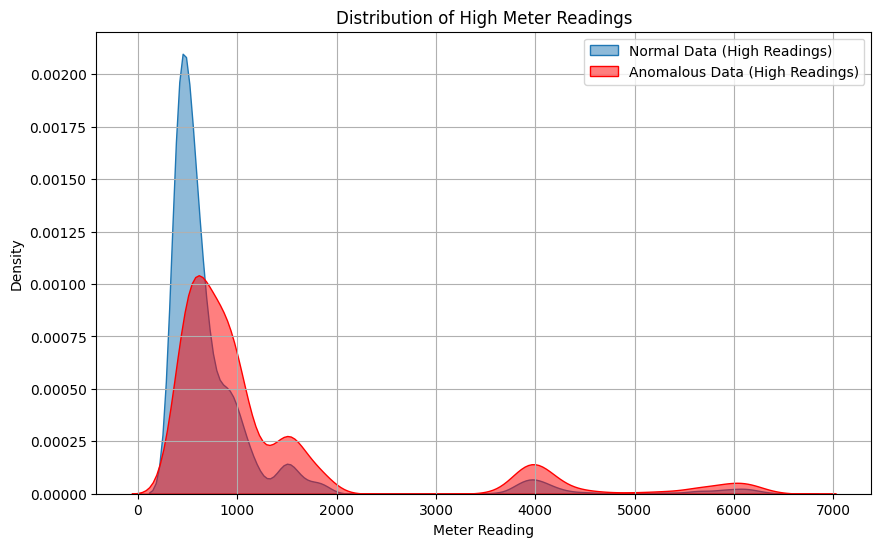

In [55]:
# Visualize Distributions
## Compare the distribution of higher meter readings for anomalous and normal data.


import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot for high meter readings: anomalies vs. normal data
plt.figure(figsize=(10, 6))
sns.kdeplot(
    BHE.loc[BHE['meter_reading'] > high_reading_threshold, 'meter_reading'],
    label='Normal Data (High Readings)', fill=True, alpha=0.5
)
sns.kdeplot(
    high_reading_anomalies['meter_reading'],
    label='Anomalous Data (High Readings)', fill=True, alpha=0.5, color='red'
)
plt.title('Distribution of High Meter Readings')
plt.xlabel('Meter Reading')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


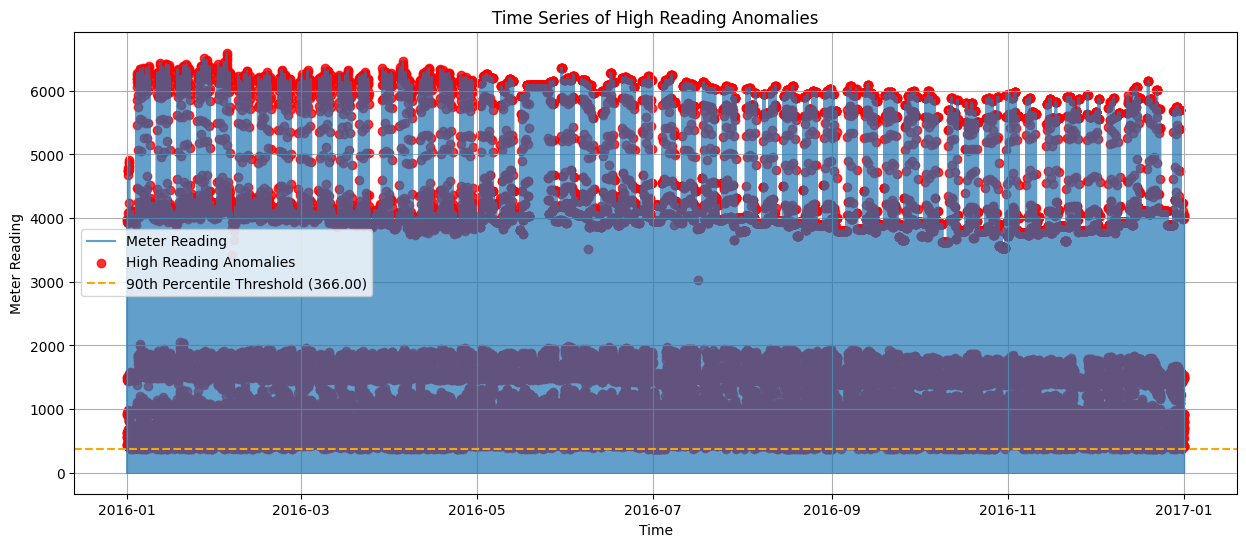

In [56]:
# Analyze Time-Based Trends
## Check if the high anomalies follow specific time patterns.

# Time series of high reading anomalies
plt.figure(figsize=(15, 6))
plt.plot(BHE['timestamp'], BHE['meter_reading'], label='Meter Reading', alpha=0.7)
plt.scatter(
    high_reading_anomalies['timestamp'],
    high_reading_anomalies['meter_reading'],
    color='red',
    label='High Reading Anomalies',
    alpha=0.8
)
plt.axhline(high_reading_threshold, color='orange', linestyle='--', label=f'90th Percentile Threshold ({high_reading_threshold:.2f})')
plt.title('Time Series of High Reading Anomalies')
plt.xlabel('Time')
plt.ylabel('Meter Reading')
plt.legend()
plt.grid()
plt.show()



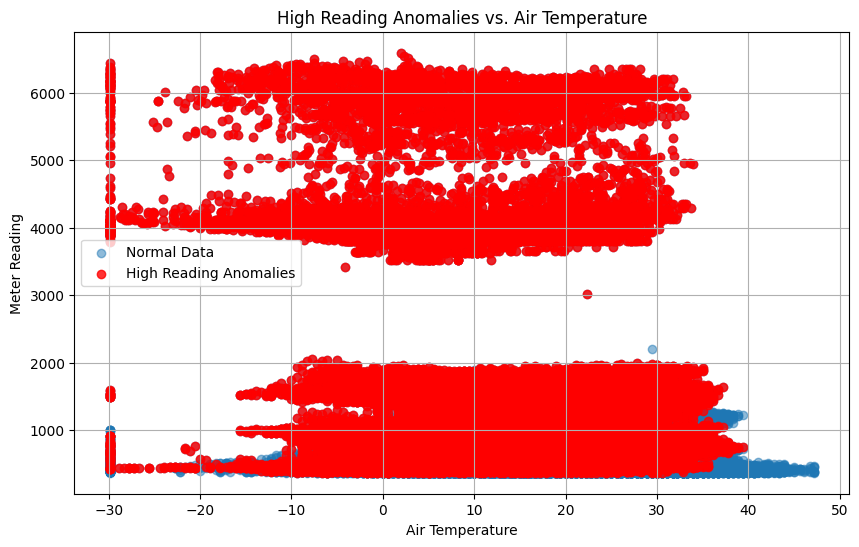

In [57]:
# Correlation with Other Features
## Explore relationships between high reading anomalies and other features (e.g., air_temperature).

# Scatter plot: High reading anomalies vs air temperature
plt.figure(figsize=(10, 6))
plt.scatter(
    BHE.loc[BHE['meter_reading'] > high_reading_threshold, 'air_temperature'],
    BHE.loc[BHE['meter_reading'] > high_reading_threshold, 'meter_reading'],
    alpha=0.5, label='Normal Data'
)
plt.scatter(
    high_reading_anomalies['air_temperature'],
    high_reading_anomalies['meter_reading'],
    color='red', alpha=0.8, label='High Reading Anomalies'
)
plt.title('High Reading Anomalies vs. Air Temperature')
plt.xlabel('Air Temperature')
plt.ylabel('Meter Reading')
plt.legend()
plt.grid()
plt.show()



# Validation Results: High Reading Anomalies

## 1. High Reading Anomalies Count
- **Count**: **70,653 anomalies** were flagged as high reading anomalies (above the 90th percentile threshold).

---

## 2. Distribution of High Meter Readings
- **Insights**:
  - The density plot shows that anomalous data (red) is concentrated in higher meter reading ranges compared to normal data (blue).
  - There is some overlap at lower high readings, indicating potential false positives where anomalies are incorrectly flagged in less extreme values.
  - At the extreme upper range of meter readings (e.g., >4,000), most points are flagged as anomalies.

---

## 3. Time Series of High Reading Anomalies
- **Insights**:
  - High reading anomalies (red points) consistently align with the peaks of meter readings over time.
  - This suggests that most peaks above the 90th percentile threshold are flagged as anomalies.
  - The anomalies do not appear to exhibit a seasonal or temporal pattern, indicating they may be true deviations or operational spikes.

---

## 4. High Reading Anomalies vs. Air Temperature
- **Insights**:
  - Anomalies are spread across all air temperature ranges, with no clear relationship between high meter readings and air temperature.
  - This suggests that air temperature alone is not a strong predictor of high meter reading anomalies.

---

## Conclusions
1. **Anomaly Characteristics**:
   - Most anomalies occur in the extreme upper ranges of meter readings (>4,000), which aligns with expected high activity or true deviations.
   - Overlap at lower high readings could indicate false positives requiring further refinement.

2. **Feature Correlations**:
   - Air temperature does not appear to explain the anomalies, suggesting the need to analyze other features (e.g., `dew_temperature`, `wind_speed`).

3. **Next Steps**:
   - Refine anomaly thresholds for better sensitivity and specificity in the overlapping range.
   - Explore correlations with additional features to validate or explain anomalies.





# Refining Anomaly Thresholds

###To refine the thresholds, we’ll focus on:

- Adjusting the High Meter Reading Threshold:
The current threshold is the 90th percentile of meter readings.
We can test other thresholds (e.g., 85th percentile or 95th percentile) to adjust sensitivity.
- Inspecting the Impact of Changes:
Count how the number of high reading anomalies changes with different thresholds.
Visualize the updated anomalies for evaluation.

In [58]:
# Adjust the Threshold and Recalculate Anomalies
## We will test different percentiles (e.g., 85th, 90th, and 95th) as thresholds for high meter readings.

# Define thresholds for refinement
percentiles = [0.85, 0.90, 0.95]
refined_anomaly_counts = {}

for p in percentiles:
    threshold = BHE['meter_reading'].quantile(p)
    # Filter anomalies above the threshold
    anomalies = BHE[
        (BHE['combined_anomaly_flag']) &
        (BHE['meter_reading'] > threshold)
    ]
    refined_anomaly_counts[f"{int(p*100)}th Percentile"] = len(anomalies)
    print(f"Threshold (Percentile {p*100:.0f}): {threshold:.2f}, Anomalies: {len(anomalies)}")


Threshold (Percentile 85): 286.56, Anomalies: 73865
Threshold (Percentile 90): 366.00, Anomalies: 70653
Threshold (Percentile 95): 555.00, Anomalies: 55769


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


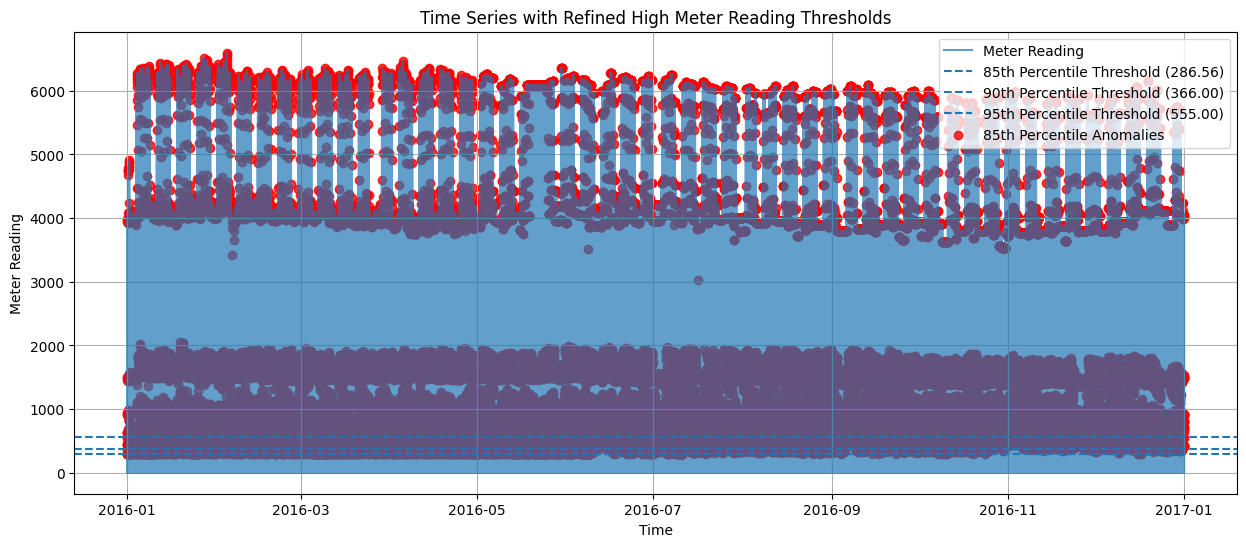

In [59]:
#Visualize the Impact of Threshold Changes
## We will create visualizations to compare how the different thresholds affect the anomalies.

# Plot meter readings with different thresholds
plt.figure(figsize=(15, 6))
plt.plot(BHE['timestamp'], BHE['meter_reading'], label='Meter Reading', alpha=0.7)

for p in percentiles:
    threshold = BHE['meter_reading'].quantile(p)
    plt.axhline(threshold, linestyle='--', label=f'{int(p*100)}th Percentile Threshold ({threshold:.2f})')

# Highlight anomalies based on the most lenient threshold (85th percentile)
threshold_85th = BHE['meter_reading'].quantile(0.85)
high_reading_anomalies_85th = BHE[
    (BHE['combined_anomaly_flag']) &
    (BHE['meter_reading'] > threshold_85th)
]
plt.scatter(
    high_reading_anomalies_85th['timestamp'],
    high_reading_anomalies_85th['meter_reading'],
    color='red', label='85th Percentile Anomalies', alpha=0.8
)

plt.title('Time Series with Refined High Meter Reading Thresholds')
plt.xlabel('Time')
plt.ylabel('Meter Reading')
plt.legend()
plt.grid()
plt.show()


# Refinement Results: High Reading Anomalies

## **Thresholds and Anomaly Counts**
1. **85th Percentile Threshold**:  
   - **Threshold Value**: **286.56**  
   - **Anomalies Count**: **73,865**

2. **90th Percentile Threshold**:  
   - **Threshold Value**: **366.00**  
   - **Anomalies Count**: **70,653**

3. **95th Percentile Threshold**:  
   - **Threshold Value**: **555.00**  
   - **Anomalies Count**: **55,769**

---

## **Observations**
1. **Anomaly Counts Decrease with Higher Thresholds**:
   - The number of anomalies decreases as the threshold increases (from 85th to 95th percentile), indicating that stricter thresholds reduce the number of flagged anomalies.
   - At the **95th percentile**, anomalies primarily capture extreme high values.

2. **Threshold Values and Sensitivity**:
   - **85th Percentile**: Captures a broader range of anomalies, including some lower high readings.
   - **90th Percentile**: Strikes a balance between capturing meaningful anomalies and avoiding false positives.
   - **95th Percentile**: Focuses on extreme outliers but may miss some significant deviations.

3. **Time Series Trends**:
   - The anomalies at all thresholds align with peaks in the time series data.
   - Lower thresholds (e.g., 85th percentile) flag more points, including potential noise near lower peaks.

---

## **Recommendations**
1. **Use the 90th Percentile Threshold**:
   - Provides a good balance of sensitivity (**70,653 anomalies**) without being overly restrictive or lenient.
   - Avoids flagging too many anomalies in lower high readings, which could represent normal operations.



# Validate the 90th Percentile Threshold with Additional Features



In [62]:
# Calculate correlations of all numerical features with `meter_reading`
correlations = BHE.select_dtypes(include=['number']).corr() # Select only numeric columns
meter_corr = correlations['meter_reading'].sort_values(ascending=False)

# Display the top correlated features (excluding `meter_reading` itself)
top_features = meter_corr.index[1:11]  # Select the top 10 most correlated features
print("Top Correlated Features with Meter Reading:")
print(meter_corr[top_features])

Top Correlated Features with Meter Reading:
square_feet                      0.562432
gte_meter_building_id_month      0.545599
gte_meter_building_id_hour       0.544188
gte_meter_building_id_weekday    0.543650
gte_meter_building_id            0.542748
gte_building_id                  0.460764
combined_anomaly_score           0.390028
gte_meter_site_id                0.361522
rolling_mean                     0.179324
rolling_std                      0.177530
Name: meter_reading, dtype: float64


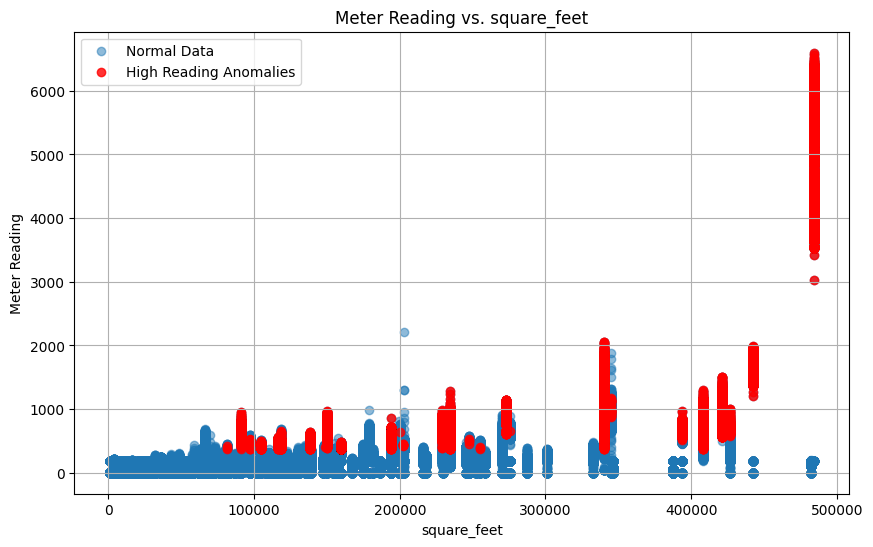

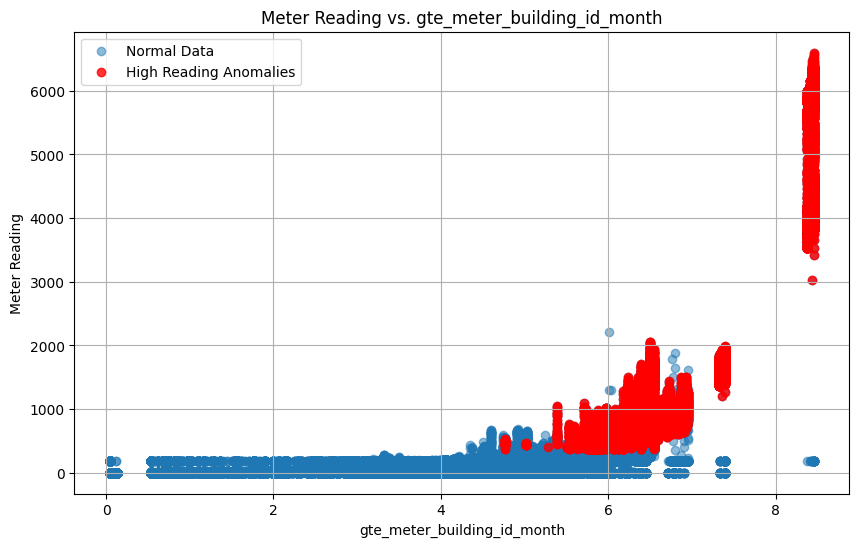

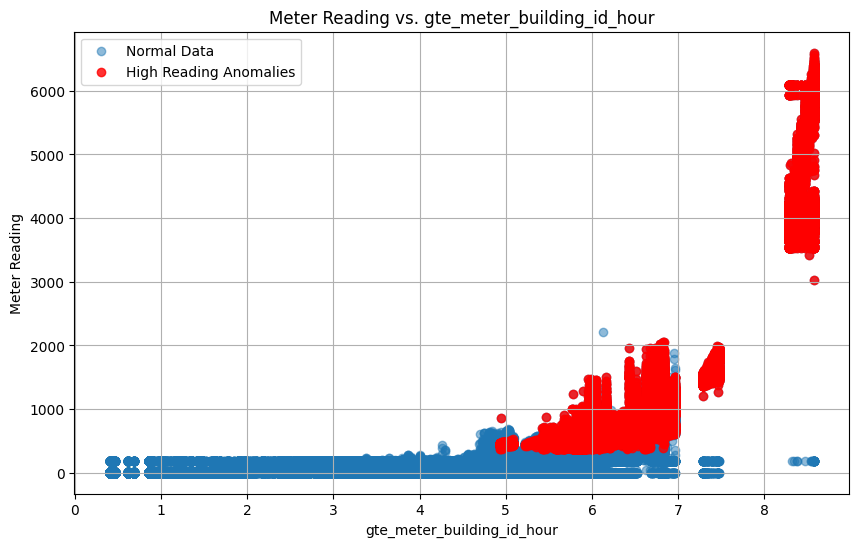

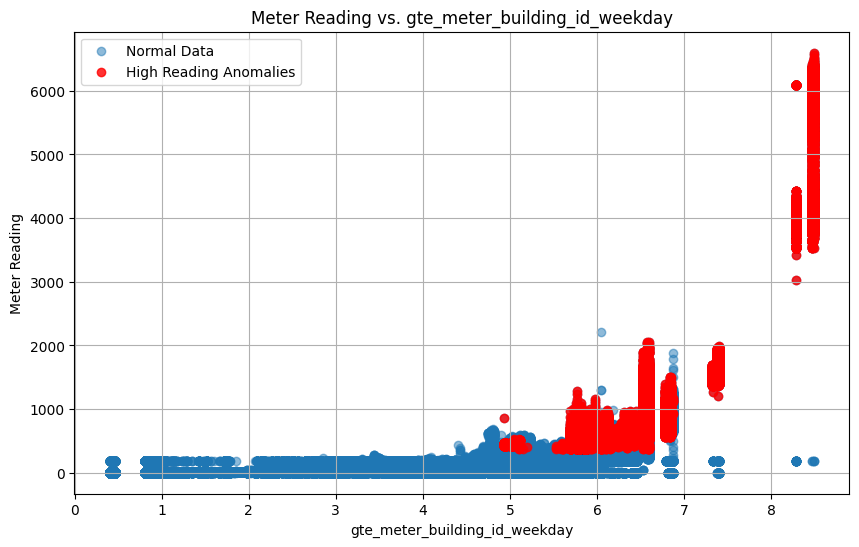

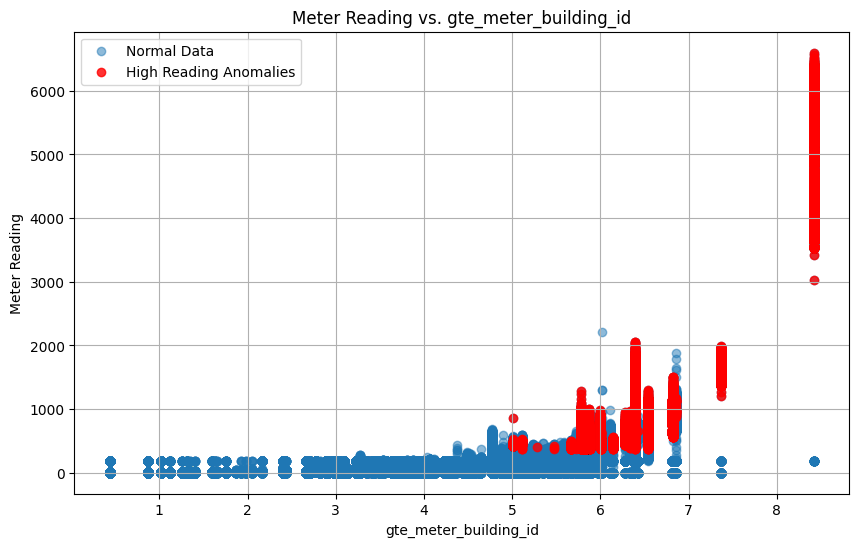

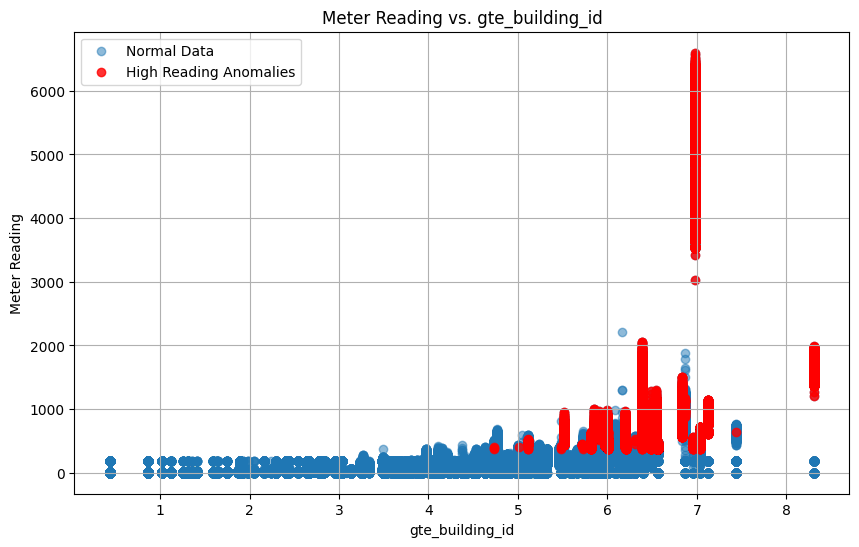

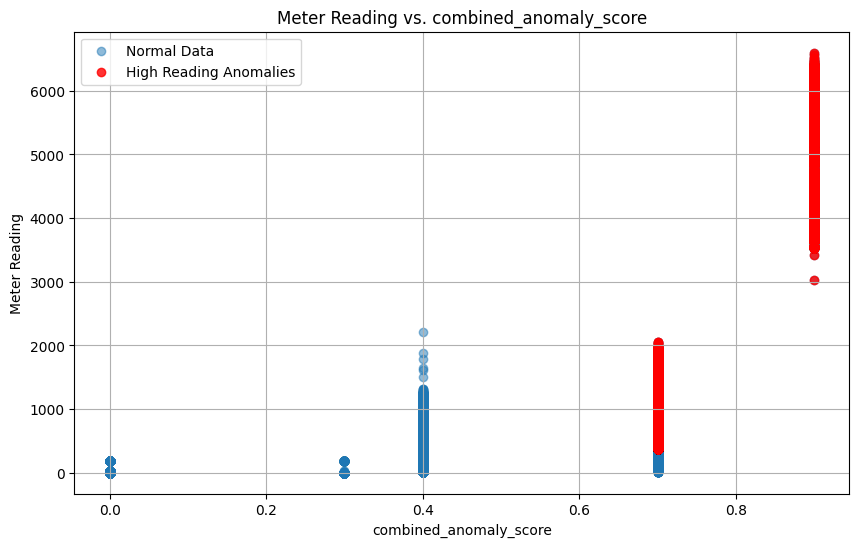

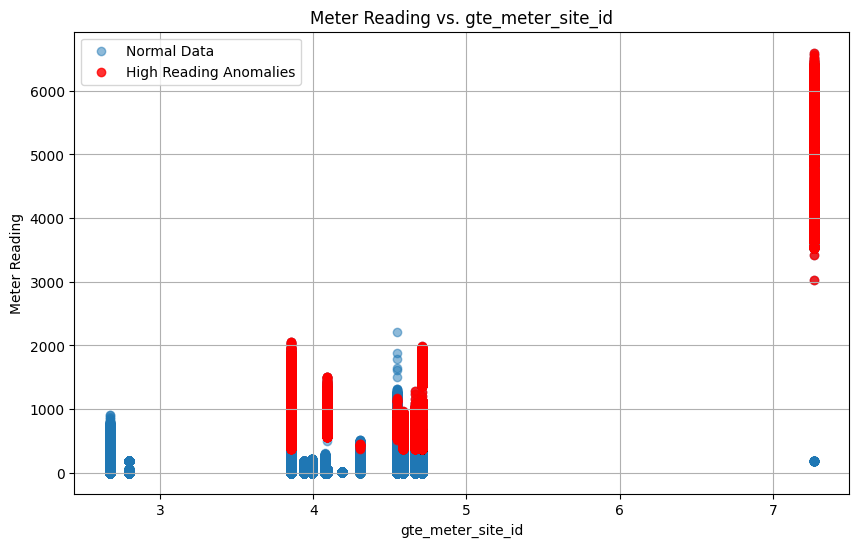

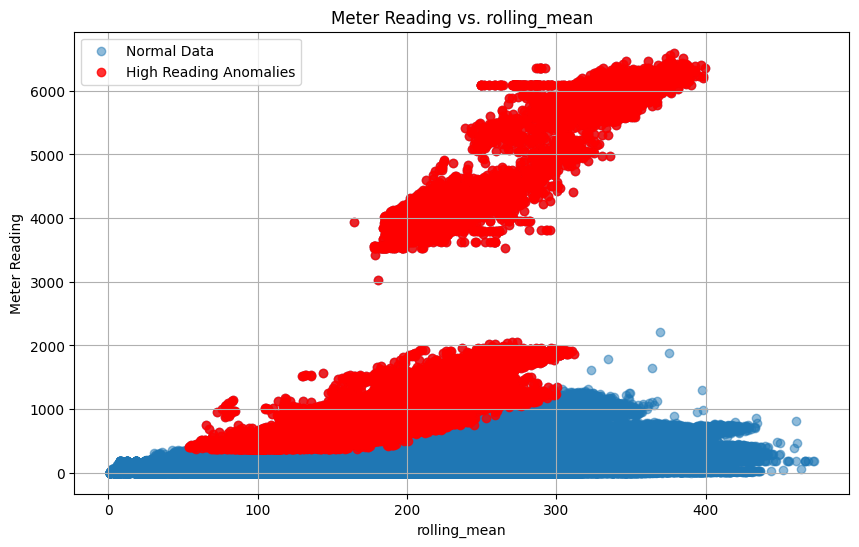

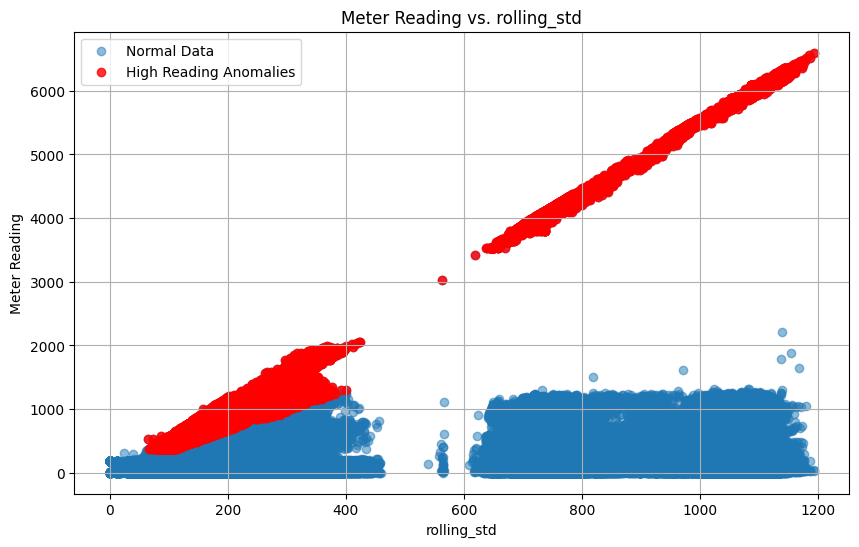

In [63]:
# Visualize High Reading Anomalies Against Correlated Features

# Import necessary libraries
import matplotlib.pyplot as plt

# Define the top 10 correlated features
top_features = [
    'square_feet', 'gte_meter_building_id_month', 'gte_meter_building_id_hour',
    'gte_meter_building_id_weekday', 'gte_meter_building_id', 'gte_building_id',
    'combined_anomaly_score', 'gte_meter_site_id', 'rolling_mean', 'rolling_std'
]

# Filter high reading anomalies based on the 90th percentile threshold
high_reading_threshold_90th = BHE['meter_reading'].quantile(0.90)
high_reading_anomalies = BHE[
    (BHE['combined_anomaly_flag']) &
    (BHE['meter_reading'] > high_reading_threshold_90th)
]

# Scatter plots for each top correlated feature
for feature in top_features:
    plt.figure(figsize=(10, 6))
    plt.scatter(
        BHE[feature], BHE['meter_reading'], alpha=0.5, label='Normal Data'
    )
    plt.scatter(
        high_reading_anomalies[feature],
        high_reading_anomalies['meter_reading'],
        color='red', alpha=0.8, label='High Reading Anomalies'
    )
    plt.title(f'Meter Reading vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Meter Reading')
    plt.legend()
    plt.grid()
    plt.show()


# **Visualization Results**

The analysis of the scatter plots showcased the relationships between `meter_reading` and the top 10 correlated features. Each plot compares normal data points (blue) with high reading anomalies (red).

---

## **1. `gte_meter_building_id_month`**
- **Insights**:
  - Anomalies (red) are concentrated in higher meter readings and primarily at later months (values near 8).
  - Indicates that higher months are associated with higher energy consumption anomalies.

---

## **2. `gte_meter_building_id_hour`**
- **Insights**:
  - Anomalies align with certain hours, with the highest concentration at hours corresponding to higher meter readings.
  - Suggests possible operational or time-of-day effects driving the anomalies.

---

## **3. `gte_meter_building_id_weekday`**
- **Insights**:
  - Anomalies are consistently distributed across weekdays but cluster at higher meter readings.
  - Reflects potential differences in weekday vs. weekend usage patterns.

---

## **4. `gte_meter_building_id`**
- **Insights**:
  - Anomalies appear concentrated in specific building IDs, indicating that certain buildings contribute more to energy anomalies.

---

## **5. `gte_building_id`**
- **Insights**:
  - Similar to `gte_meter_building_id`, anomalies are associated with specific building IDs.
  - Highlights possible building-specific energy inefficiencies or patterns.

---

## **6. `combined_anomaly_score`**
- **Insights**:
  - High anomaly scores strongly correspond to higher meter readings, validating the scoring method's effectiveness.

---

## **7. `gte_meter_site_id`**
- **Insights**:
  - Anomalies are associated with specific site IDs, suggesting location-specific patterns influencing meter readings.

---

## **8. `rolling_mean`**
- **Insights**:
  - Higher rolling averages correspond to higher anomalies, suggesting that sustained high energy consumption is a strong predictor of anomalies.

---

## **9. `rolling_std`**
- **Insights**:
  - Anomalies align with higher rolling standard deviations, indicating that variability in energy usage is a significant factor in detecting anomalies.

---

## **10. `square_feet`**
- **Insights**:
  - Larger buildings (higher square footage) are more likely to have high energy anomalies, consistent with expectations.

---

# **Conclusions**
1. The top features provide meaningful insights into the factors driving high reading anomalies.
2. Features like `square_feet`, `gte_meter_building_id_month`, and `combined_anomaly_score` strongly correlate with higher anomalies.
3. Rolling statistics (`rolling_mean` and `rolling_std`) validate sustained or variable high energy usage as key predictors.

---

# **Next Steps**
1. **Feature Prioritization**:
   - Focus on the most impactful features for anomaly detection refinement (`square_feet`, `gte_meter_building_id_month`, etc.).
2. **Threshold Adjustments**:
   - Further refine thresholds for features with significant overlaps (e.g., `rolling_mean`, `rolling_std`).
3. **Advanced Modeling**:
   - Incorporate the top features into advanced models (e.g., clustering or predictive models) for anomaly prediction.


